In [1]:
from csv_analysis import BayesDB_Simulator, pred_wrapper, add_bouts_reversed_label, make_regression_plots
import pandas as pd
import numpy as np
import seaborn as sb
from scipy.stats import norm, beta, gamma, erlang, alpha, exponnorm
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
sb.set()
husl = sb.color_palette("husl",8)
cp = sb.color_palette()
#sb.palplot(husl)
#sb.set_style('ticks')
#sb.set_style('whitegrid')
sb.reset_orig()
#sb.set_style('whitegrid')
sb.set_style('white')
sb.axes_style({'ytick.right':False})
#sb.set_style("ticks", {"xtick.major.size": -1, "ytick.major.size": -1})
#sb.set_style({'xtick.minor.size': 0})
sb.set_style({"xtick.direction": "in","ytick.direction": "in", 'ytick.right':False, 'ytick.left': False})
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
from matplotlib import pyplot as pl



/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
fish_id = "wik_bdb"
file_id = "bdb_hunts_inverted.bdb"
file_id_raw = "bdb_hunts.bdb"
file_id_allnans = "bdb_hunts_rev_w_nans.bdb"
bdsim = BayesDB_Simulator(fish_id, file_id, -1)
data = pd.read_csv('wik_bdb/huntbouts_inverted.csv')
data_raw = pd.read_csv('wik_bdb/all_huntbouts_rev.csv')
bdsim_raw = BayesDB_Simulator(fish_id, file_id_raw, -1)
bdsim_allnans = BayesDB_Simulator(fish_id, file_id_allnans, -1)



### USE FOR STANDARD 2V QUERIES

SELECT "Rev Bout Number" FROM bout_table WHERE "Para Az" > .087 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Rev Bout Number" FROM bout_table WHERE "Para Az" < .087 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
1111 bouts in Query 1
Mean Q1 = -5.02700270027
581 bouts in Query 2
Mean Q2 = -4.11876075731
Ttest_indResult(statistic=-5.8800833683087994, pvalue=4.9313187114529007e-09)


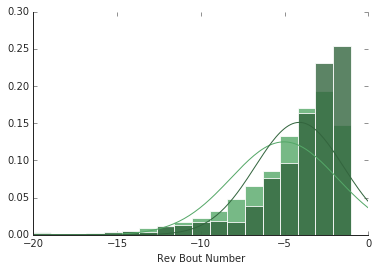

Counter({-3.0: 221, -4.0: 196, -2.0: 170, -5.0: 152, -6.0: 98, -7.0: 75, -8.0: 55, -9.0: 36, -10.0: 26, -11.0: 19, 1.0: 16, -12.0: 12, -13.0: 11, -14.0: 6, -16.0: 3, -15.0: 3, -20.0: 2, -18.0: 2, -17.0: 2, -25.0: 1, -24.0: 1, -23.0: 1, -22.0: 1, -21.0: 1, -19.0: 1})
-3.0
-4.0


In [15]:
color = cp[2]
varb = '"Rev Bout Number"'
#lims = [-20, 20, 2]
lims = [-20, 0, 1]
# raw_q = bdsim.compare_2_queries(varb, 
#     '"Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
#     '"Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
#     1, 0, color, lims, 1)

raw_q = bdsim.compare_2_queries(varb, 
    '"Para Az" > .087 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
    '"Para Az" < .087 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
    1, 0, color, lims)

# raw_q = bdsim_raw.compare_2_queries(varb, 
#     '"Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
#     '"Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
#     1, 0, color, lims, 1)

# raw_q = bdsim_raw.compare_2_queries(varb, 
#     '"Para Alt" BETWEEN .349 - .087 AND .349 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     '"Para Alt" BETWEEN .349 - .087 AND .349 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     1, 0, color, lims, 1)

print np.median(raw_q[2])
print np.median(raw_q[1])


raw_q[0].savefig('twovp.pdf')

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3
87 bouts in Query 1
Mean Q1 = 8.9052696949
138 bouts in Query 2
Mean Q2 = -1.34395181414
Ttest_indResult(statistic=3.056881499619132, pvalue=0.0025095590704998635)


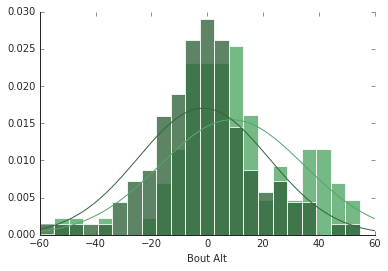

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .349 - .087 AND .349 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .349 - .087 AND .349 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
115 bouts in Query 1
Mean Q1 = 12.9747058533
184 bouts in Query 2
Mean Q2 = -0.549860062526
Ttest_indResult(statistic=4.8587027192580683, pvalue=1.9157283708168861e-06)


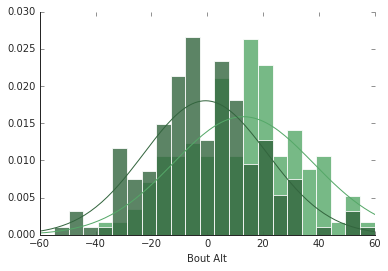

In [70]:
color = cp[2]
varb = '"Bout Alt"'
#lims = [-20, 20, 2]
lims = [-60, 60, 5]
# raw_q = bdsim.compare_2_queries(varb, 
#     '"Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
#     '"Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
#     1, 0, color, lims, 1)

# raw_q = bdsim_raw.compare_2_queries(varb, 
#     '"Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
#     '"Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
#     1, 0, color, lims, 1)

# raw_q = bdsim_raw.compare_2_queries(varb, 
#     '"Para Alt" BETWEEN .349 - .087 AND .349 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     '"Para Alt" BETWEEN .349 - .087 AND .349 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     1, 0, color, lims, 1)

raw_q[0].savefig('twovp.pdf')

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.087 AND 0 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.087 AND 0 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
187 bouts in Query 1
Mean Q1 = -13.2366619178
120 bouts in Query 2
Mean Q2 = 1.14525125382
Ttest_indResult(statistic=-4.6039132710977233, pvalue=6.0936177781282021e-06)


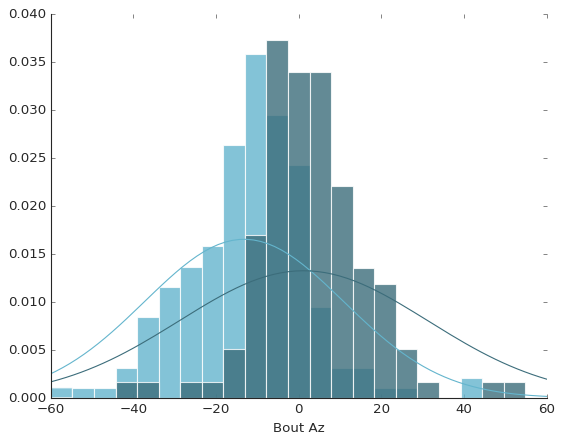

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.175 AND -.087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.175 AND -.087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
126 bouts in Query 1
Mean Q1 = -17.6855574906
71 bouts in Query 2
Mean Q2 = -4.78667708195
Ttest_indResult(statistic=-3.0712826085812237, pvalue=0.0024357578783335446)


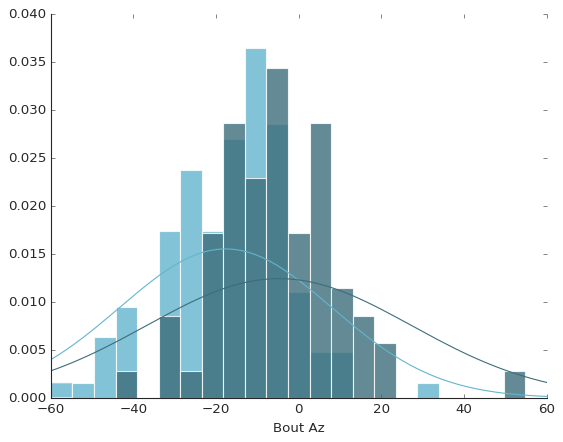

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.261 AND -.175 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.261 AND -.175 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
84 bouts in Query 1
Mean Q1 = -25.93890233
48 bouts in Query 2
Mean Q2 = -10.8196498307
Ttest_indResult(statistic=-3.1343401461595213, pvalue=0.0021294658884756733)


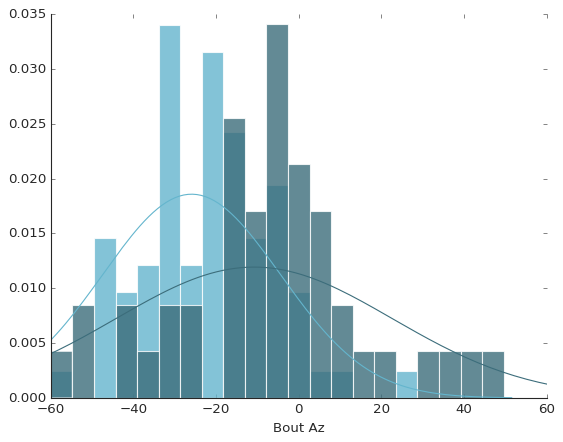

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.349 AND -.261 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.349 AND -.261 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
60 bouts in Query 1
Mean Q1 = -41.370522293
14 bouts in Query 2
Mean Q2 = -19.5355286547
Ttest_indResult(statistic=-2.2425095577912102, pvalue=0.028008380427791139)


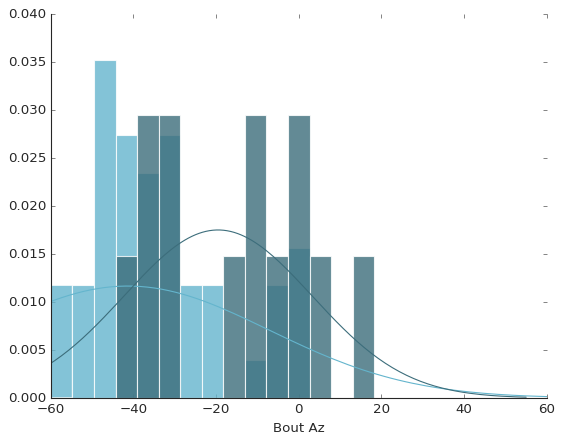

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.436 AND -.349 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.436 AND -.349 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
29 bouts in Query 1
Mean Q1 = -41.9018443946
10 bouts in Query 2
Mean Q2 = -18.2154520092
Ttest_indResult(statistic=-1.6099368071188669, pvalue=0.11591162429306343)


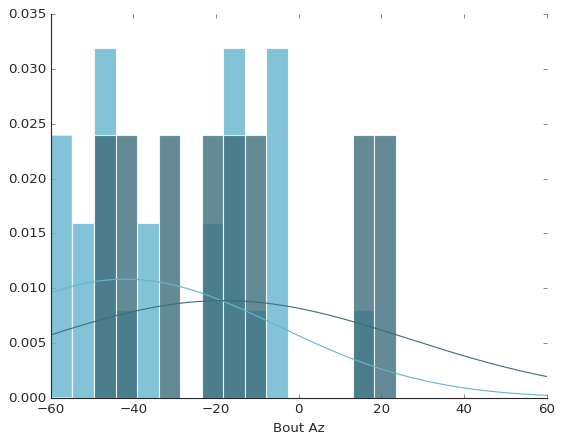

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.524 AND -.436 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN -.524 AND -.436 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
25 bouts in Query 1
Mean Q1 = -37.8871350677
12 bouts in Query 2
Mean Q2 = -24.6902247484
Ttest_indResult(statistic=-0.7975906791254449, pvalue=0.43048625963147114)


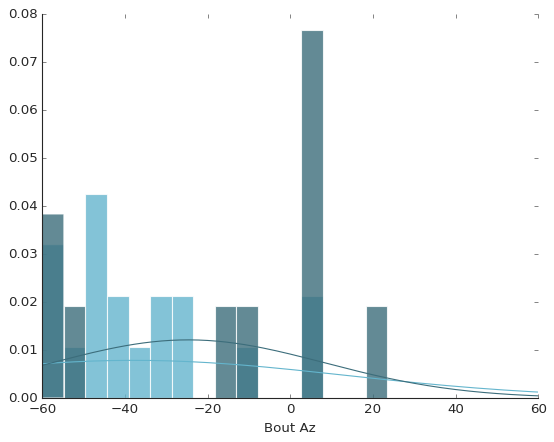

SELECT "Bout Az" FROM bout_table WHERE "Para Az" < -.524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" < -.524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
37 bouts in Query 1
Mean Q1 = -70.9471693055
23 bouts in Query 2
Mean Q2 = -58.9066546837
Ttest_indResult(statistic=-1.0917557034970269, pvalue=0.27945493443407654)


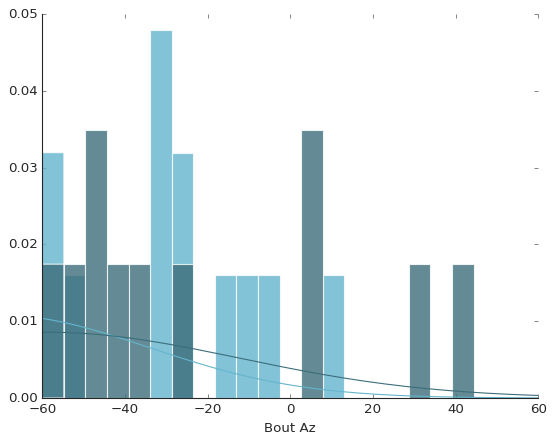

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
174 bouts in Query 1
Mean Q1 = 12.7933966497
141 bouts in Query 2
Mean Q2 = -2.36202587436
Ttest_indResult(statistic=5.2557898401450469, pvalue=2.7330191614888167e-07)


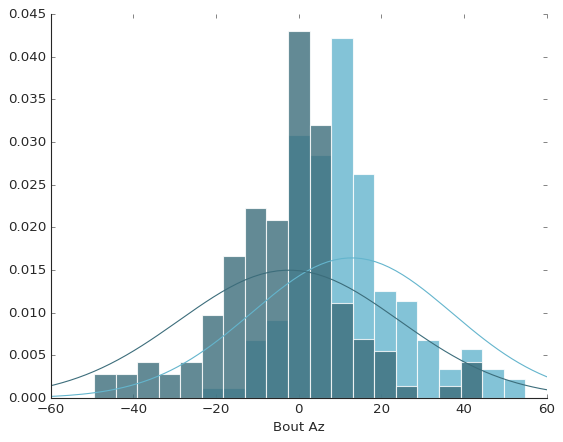

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .087 AND .175 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .087 AND .175 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
139 bouts in Query 1
Mean Q1 = 24.1189373814
116 bouts in Query 2
Mean Q2 = 6.69104590819
Ttest_indResult(statistic=5.5527741880595709, pvalue=7.0990533280954175e-08)


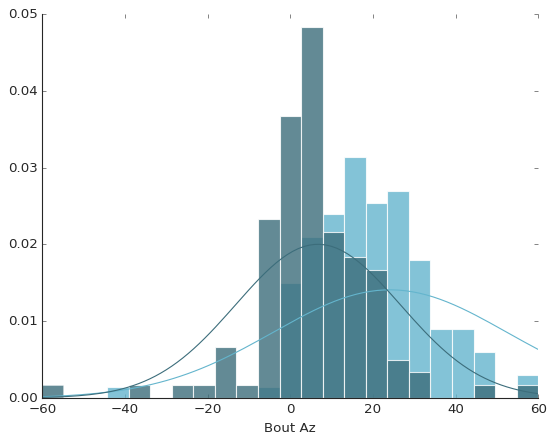

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .175 AND .261 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .175 AND .261 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
90 bouts in Query 1
Mean Q1 = 25.8035203142
36 bouts in Query 2
Mean Q2 = 9.47118354475
Ttest_indResult(statistic=3.0397952439284444, pvalue=0.0028884622326072274)


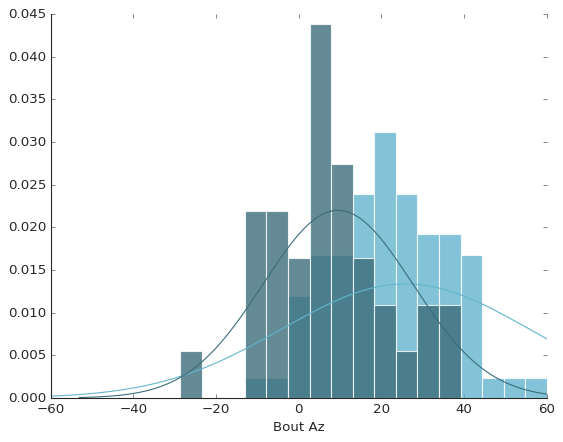

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .261 AND .349 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .261 AND .349 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
59 bouts in Query 1
Mean Q1 = 36.6502705181
29 bouts in Query 2
Mean Q2 = 25.1824664313
Ttest_indResult(statistic=1.8522703723672755, pvalue=0.067417767955241945)


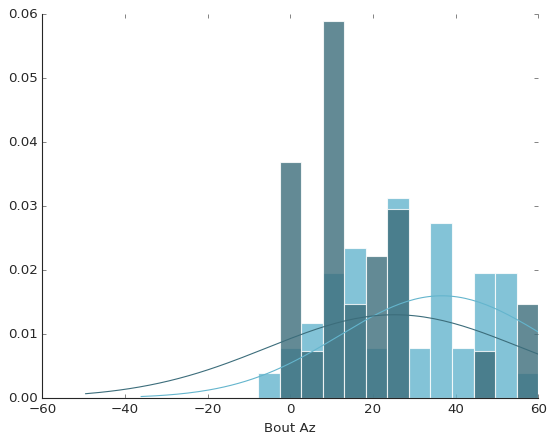

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .349 AND .436 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .349 AND .436 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
28 bouts in Query 1
Mean Q1 = 37.8911122129
14 bouts in Query 2
Mean Q2 = 19.7006554187
Ttest_indResult(statistic=1.92040760573767, pvalue=0.061955989733654127)


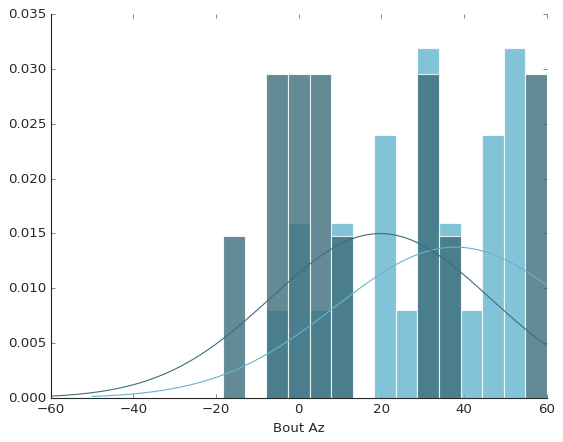

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .436 AND .524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .436 AND .524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
20 bouts in Query 1
Mean Q1 = 54.4891461347
18 bouts in Query 2
Mean Q2 = 28.5712837714
Ttest_indResult(statistic=2.7579585906324384, pvalue=0.0090802776623880276)


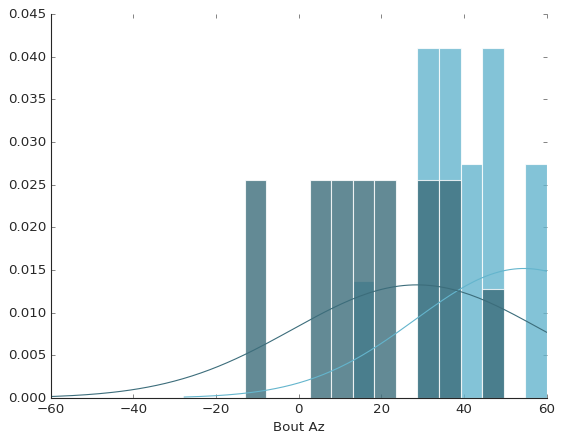

SELECT "Bout Az" FROM bout_table WHERE "Para Az" > .524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" > .524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
44 bouts in Query 1
Mean Q1 = 75.0064967218
27 bouts in Query 2
Mean Q2 = 22.795777848
Ttest_indResult(statistic=3.6541615100021771, pvalue=0.000498902166233174)


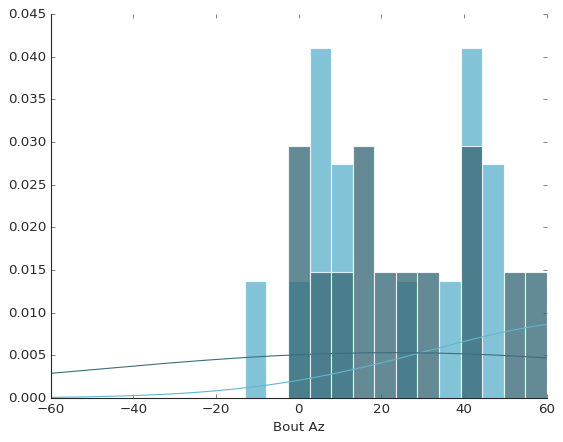

In [46]:
color = cp[9]
lims = [-60, 60, 5]
varb = '"Bout Az"'
# raw_q = bdsim_raw_raw.compare_2_queries('"Bout Az"', 
#     '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#     '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#     1, 0, color)

naz0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.087 AND 0 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.087 AND 0 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

pl.savefig('Az_2q.pdf')

naz1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.175 AND -.087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.175 AND -.087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
naz2 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.261 AND -.175 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.261 AND -.175 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
naz3 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.349 AND -.261 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.349 AND -.261 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
naz4 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.436 AND -.349 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.436 AND -.349 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
naz5 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.524 AND -.436 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.524 AND -.436 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

naz6 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" < -.524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" < -.524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

az0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)

az0[0].savefig('az_2q.pdf')

az1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .087 AND .175 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" BETWEEN .087 AND .175 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)
az2 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .175 AND .261 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" BETWEEN .175 AND .261 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)
az3 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .261 AND .349 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" BETWEEN .261 AND .349 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)
az4 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .349 AND .436 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" BETWEEN .349 AND .436 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)
az5 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .436 AND .524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" BETWEEN .436 AND .524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)

az6 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" > .524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" > .524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)

# NOTE THAT THE QUERIES BELOW ALL RETURN LESS THAN 20 BOUTS TOTAL. THEREFORE COMBINED ALL ABOVE .524 (30 degrees)

# az6 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN .524 AND .611 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
#         '"Para Az" BETWEEN .524 AND .611 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
#         1, 0, color, lims,1)
# az7 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN .611 AND .698 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
#         '"Para Az" BETWEEN .611 AND .698 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
#         1, 0, color, lims,1)
# az8 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN .698 AND .785 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
#         '"Para Az" BETWEEN .698 AND .785 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
#         1, 0, color, lims,1)


# THERE ARENT ENOUGH BOUTS IN 7 OR 8 TO PLOT. 6 HAS 24 BOUTS. TO BE SYMMETRIC WITH POS, USE LESS THAN -.524. 

# az6 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN -.611 AND -.524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#         '"Para Az" BETWEEN -.611 AND -.524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#         1, 0, color, lims, 1)
# az7 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN -.698 AND -.611 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#         '"Para Az" BETWEEN -.698 AND -.611 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#         1, 0, color, lims, 1)
# az8 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN -.785 AND -.698 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#         '"Para Az" BETWEEN -.785 AND -.698 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#         1, 0, color, lims, 1)




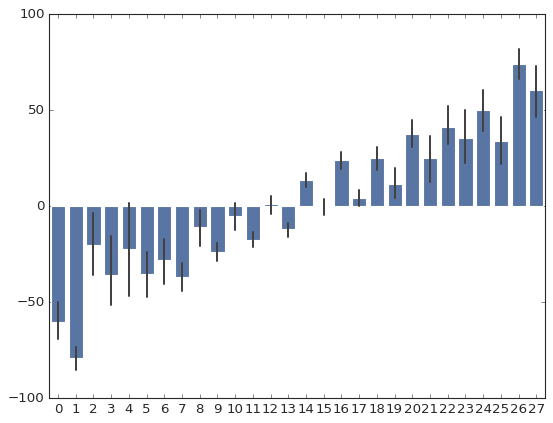

In [69]:
# NEG OR POS

# fig = sb.barplot(data=[az0[1], az0[2], az1[1], az1[2], az2[1], az2[2], az3[1], az3[2],
#                  az4[1], az4[2], az5[1], az5[2], az6[1], az6[2]], ci=95, color='b')

# BOTH

fig = sb.barplot(data=[naz6[2], naz6[1], naz5[2], naz5[1], naz4[2], naz4[1], naz3[2], naz3[1], 
                       naz2[2], naz2[1], naz1[2], naz1[1], naz0[2], naz0[1], 
                       az0[1], az0[2], az1[1], az1[2], az2[1], az2[2], az3[1], az3[2],
                       az4[1], az4[2], az5[1], az5[2], az6[1], az6[2]], ci=95, color='b')



pl.savefig('bars.pdf')
pl.show()

### USE FOR ALT QUERIES

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN -.087 AND 0 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN -.087 AND 0 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
42 bouts in Query 1
Mean Q1 = -15.9216898169
31 bouts in Query 2
Mean Q2 = -12.1826084501
Ttest_indResult(statistic=-0.70539124042855916, pvalue=0.48287469672606576)


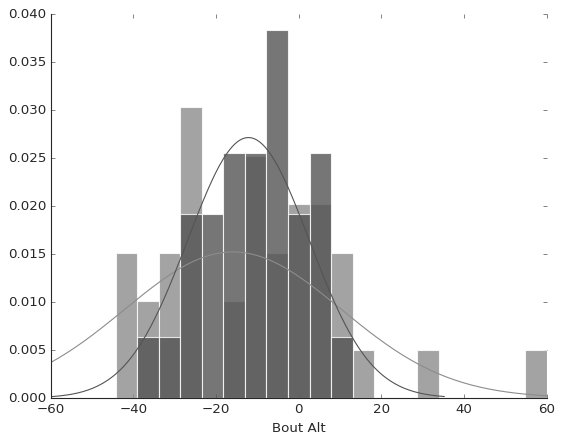

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" < -.087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" < -.087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
132 bouts in Query 1
Mean Q1 = -18.1318748234
100 bouts in Query 2
Mean Q2 = -11.0649838006
Ttest_indResult(statistic=-2.0382576237106966, pvalue=0.042668422546745285)


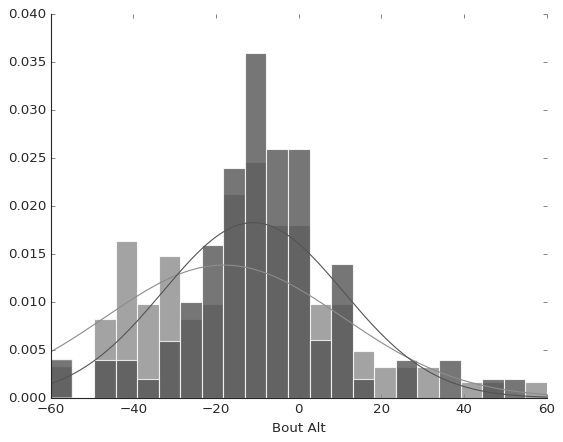

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
39 bouts in Query 1
Mean Q1 = -7.17464671071
65 bouts in Query 2
Mean Q2 = -10.0428197399
Ttest_indResult(statistic=0.64330493187955673, pvalue=0.52146992690974914)


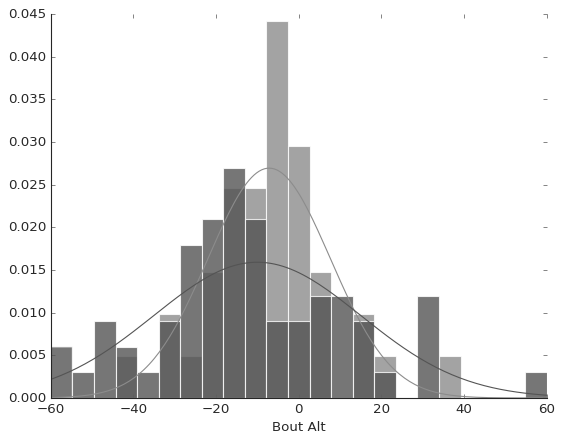

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .087 AND .175 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .087 AND .175 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
51 bouts in Query 1
Mean Q1 = -2.27776016056
93 bouts in Query 2
Mean Q2 = -16.5723850316
Ttest_indResult(statistic=3.1463319708773065, pvalue=0.0020146536315176497)


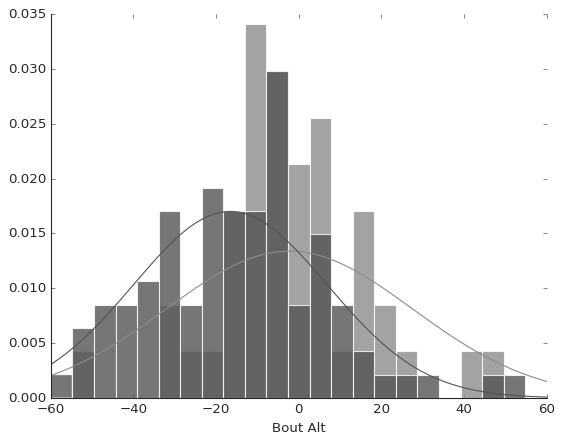

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .175 AND .261 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .175 AND .261 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
56 bouts in Query 1
Mean Q1 = -2.68756754635
107 bouts in Query 2
Mean Q2 = -6.03824203923
Ttest_indResult(statistic=0.80998817634360398, pvalue=0.41914253671151824)


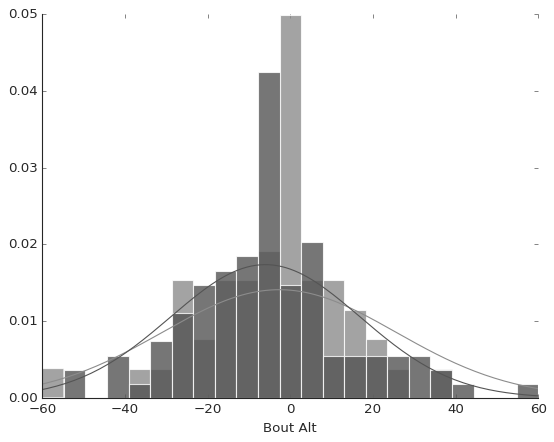

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .261 AND .349 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .261 AND .349 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
66 bouts in Query 1
Mean Q1 = 7.87144660236
110 bouts in Query 2
Mean Q2 = -4.35408921604
Ttest_indResult(statistic=3.7383831828884477, pvalue=0.00025104989903617221)


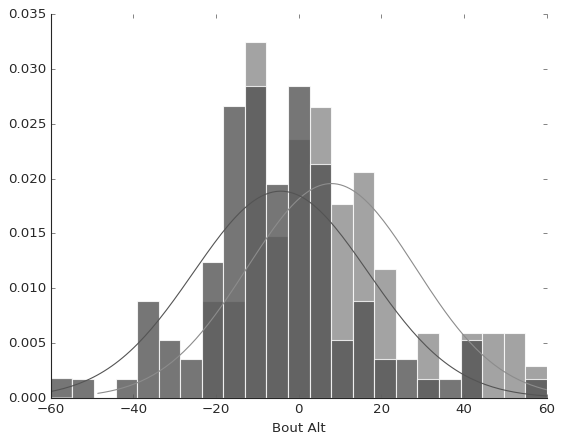

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
87 bouts in Query 1
Mean Q1 = 8.9052696949
138 bouts in Query 2
Mean Q2 = -1.34395181414
Ttest_indResult(statistic=3.056881499619132, pvalue=0.0025095590704998635)


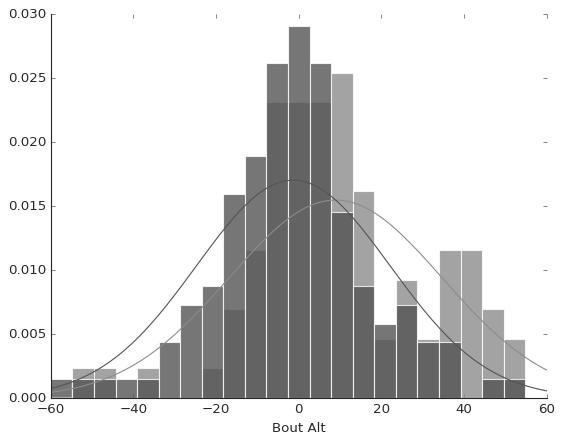

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .436 AND .524 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .436 AND .524 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
88 bouts in Query 1
Mean Q1 = 15.0841246094
95 bouts in Query 2
Mean Q2 = 6.08550911735
Ttest_indResult(statistic=2.4227594911271151, pvalue=0.016388518784205434)


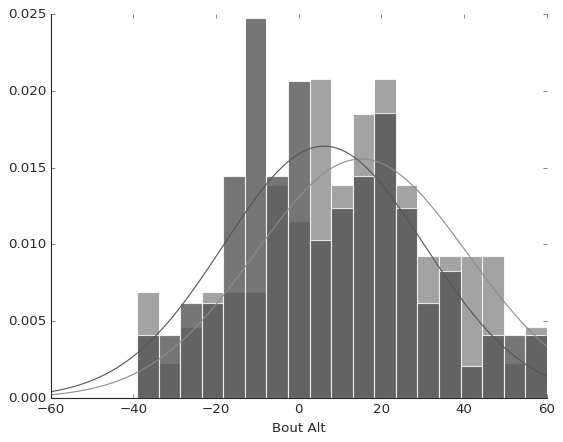

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .524 AND .611 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .524 AND .611 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
65 bouts in Query 1
Mean Q1 = 14.4473573147
70 bouts in Query 2
Mean Q2 = 1.27063574249
Ttest_indResult(statistic=2.6592513383548964, pvalue=0.008793538262643414)


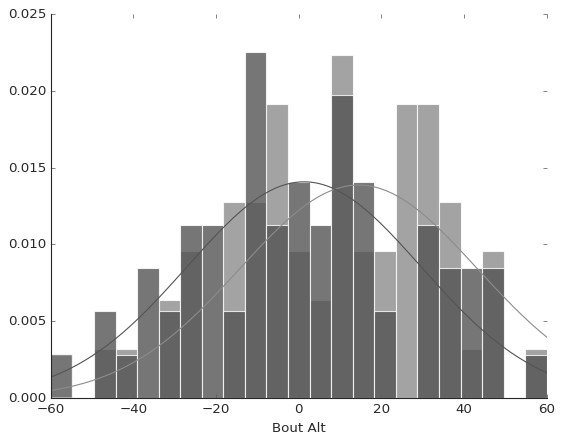

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .611 AND .698 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .611 AND .698 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
37 bouts in Query 1
Mean Q1 = 26.6044734715
47 bouts in Query 2
Mean Q2 = 8.23538590855
Ttest_indResult(statistic=2.5031230949972842, pvalue=0.014295299298720986)


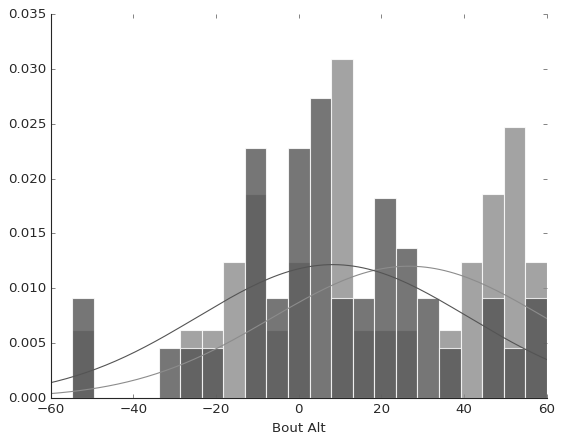

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .698 AND .785 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .698 AND .785 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
36 bouts in Query 1
Mean Q1 = 26.1097949893
18 bouts in Query 2
Mean Q2 = 3.49518831394
Ttest_indResult(statistic=2.0030591841081917, pvalue=0.050396069810189084)


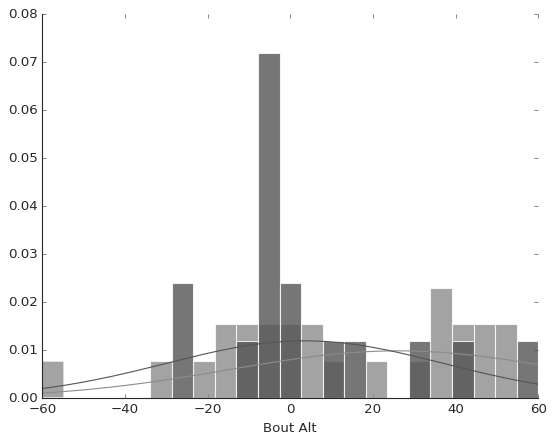

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" > .785 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" > .785 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3
30 bouts in Query 1
Mean Q1 = 15.8971973578
30 bouts in Query 2
Mean Q2 = -7.62888709859
Ttest_indResult(statistic=2.4998418023925351, pvalue=0.015275370287153766)


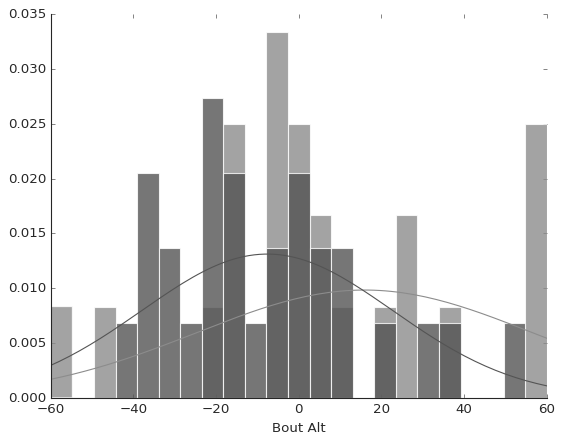

In [42]:
color = cp[7]
varb = '"Bout Alt"'
# raw_q = bdsim_raw_raw.compare_2_queries('"Bout Alt"', 
#     '"Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
#     '"Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
#     1, 0, color)

nalt0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN -.087 AND 0 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        '"Para Alt" BETWEEN -.087 AND 0 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        1, 0, color, lims, 1)

pl.savefig('Alt_2q.pdf')


nalt1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" < -.087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        '"Para Alt" < -.087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        1, 0, color, lims, 1)

alt0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN 0 AND .087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        '"Para Alt" BETWEEN 0 AND .087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        1, 0, color, lims, 1)

alt1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .087 AND .175 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        '"Para Alt" BETWEEN .087 AND .175 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        1, 0, color, lims, 1)
alt2 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .175 AND .261 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        '"Para Alt" BETWEEN .175 AND .261 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        1, 0, color, lims, 1)
alt3 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .261 AND .349 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        '"Para Alt" BETWEEN .261 AND .349 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        1, 0, color, lims, 1)
alt4 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        '"Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        1, 0, color, lims, 1)

alt3[0].savefig('Alt_2q_15to20.pdf')
alt4[0].savefig('Alt_2q_20to25.pdf')

alt5 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .436 AND .524 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        '"Para Alt" BETWEEN .436 AND .524 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
         1, 0, color, lims, 1)
alt6 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .524 AND .611 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        '"Para Alt" BETWEEN .524 AND .611 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        1, 0, color, lims, 1)
alt7 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .611 AND .698 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        '"Para Alt" BETWEEN .611 AND .698 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        1, 0, color, lims, 1)
alt8 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .698 AND .785 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        '"Para Alt" BETWEEN .698 AND .785 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        1, 0, color, lims, 1)

alt9 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" > .785 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        '"Para Alt" > .785 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Rev Bout Number" <= 4 AND "Strike Or Abort" == 3', 
        1, 0, color, lims, 1)

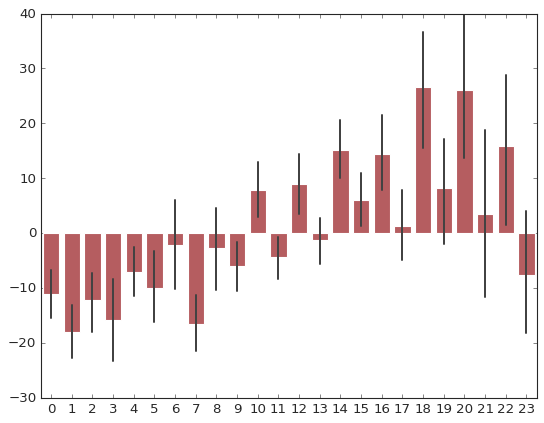

In [43]:
# POSITIVE

# sb.barplot(data=[alt0[1], alt0[2], alt1[1], alt1[2], alt2[1], alt2[2], alt3[1], alt3[2],
#                  alt4[1], alt4[2], alt5[1], alt5[2], alt6[1], alt6[2], alt7[1], alt7[2],
#                  alt8[1], alt8[2], alt9[1], alt9[2]], ci=95, color='r')


# NEGATIVE 

# sb.barplot(data=[alt0[1], alt0[2], alt1[1], alt1[2]], color='r', ci=95)


# BOTH

sb.barplot(data=[nalt1[2], nalt1[1], nalt0[2], nalt0[1], alt0[1], alt0[2], alt1[1], alt1[2], alt2[1], alt2[2], alt3[1], alt3[2],
                 alt4[1], alt4[2], alt5[1], alt5[2], alt6[1], alt6[2], alt7[1], alt7[2],
                 alt8[1], alt8[2], alt9[1], alt9[2]], ci=95, color='r')

pl.savefig('bars.pdf')

pl.show()

### USE FOR DESCRIBING PARA POSITION CONTROLS

SELECT "Para Az" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Para Az" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
147 bouts in Query 1
Mean Q1 = 0.0451954299592
168 bouts in Query 2
Mean Q2 = 0.0430236095952
Ttest_indResult(statistic=0.7737252825455373, pvalue=0.43967724308726863)


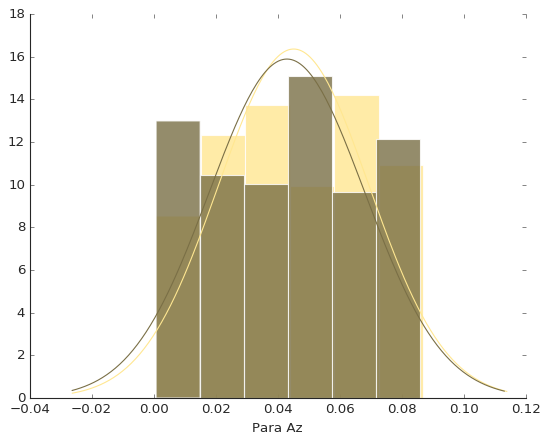

In [97]:
color = cp[8]
two_p = bdsim_raw.compare_2_queries('"Para Az"', 
    '"Para Az" BETWEEN 0 AND .087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
    '"Para Az" BETWEEN 0 AND .087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3',
    1, 0, color)

### OVERLAPPING TWO VARIABLE REGRESSIONS

SELECT "Para Az","Bout Delta Yaw" FROM bout_table WHERE "Bout Number" > 0 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1784
Model:                            GLM   Df Residuals:                     1782
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   50.8729345839
Method:                          IRLS   Log-Likelihood:                -6035.3
Date:                Sun, 23 Jun 2019   Deviance:                       90656.
Time:                        01:31:26   Pearson chi2:                 9.07e+04
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4847      0.16

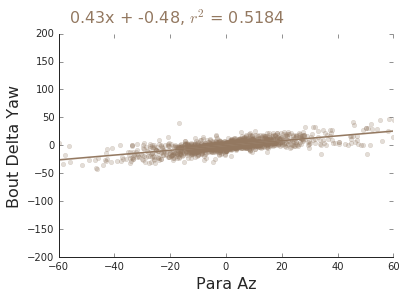

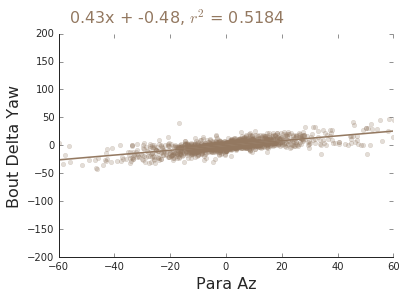

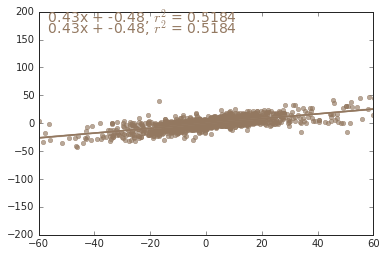

In [6]:
labels = ("Para Az", "Bout Delta Yaw")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
#colors = [np.array(cp[0]) * .7, np.array(cp[0]) * 1.4]
#colors = [cp[0], cp[2]]
#colors = [cp[7], cp[6]]
#colors = [cp[6], cp[6]]
#colors = [.7* az_blue, az_blue]
colors = [cp[5], cp[5]]

#lims = [[np.nan, np.nan], [np.nan, np.nan]]
lims = [[-60, 60], [-200, 200]]
#lims = [[-200, 200], [-200, 200]]
#lims = [[-100, 100], [-200, 200]]


# USE THESE FOR ALT

# rp = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" < -4  AND "Strike Or Abort" == 3', 
#     colors[1], labels, lims, 1)


# rp2 = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Rev Bout Number" < 0 AND "Strike Or Abort" == 3', 
#     colors[1], labels, lims, 1)

# rp = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Para Alt" > 0 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     colors[1], labels, lims)


# rp = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Para Alt" > 0 AND "Bout Number" > 0 AND "Para Alt Velocity" < 0 AND "Strike Or Abort" < 3', 
#     colors[1], labels, lims, 1)

# rp2 = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Para Alt" > 0 AND "Bout Number" > 0 AND "Para Alt Velocity" > 0 AND "Strike Or Abort" < 3', 
#     colors[1], labels, lims, 1)



# # # rp2 = bdsim_raw.two_variable_regression(
# # #     query_exp,
# # #     '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
# # #     colors[1], labels, lims)

# rp2 = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Para Alt" > 0 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     colors[1], labels, lims)


# USE THESE FOR AZ AND DIST



rp = bdsim_raw.two_variable_regression(
        query_exp,
        '"Bout Number" > 0 AND "Strike Or Abort" < 3', 
        colors[1], labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
        query_exp,
        '"Bout Number" > 0 AND "Strike Or Abort" < 3', 
        colors[1], labels, lims, 1)

# rp = bdsim_raw.two_variable_regression(
#         query_exp,
#         '"Bout Number" == 0 AND "Para Az Velocity" > 0 AND "Strike Or Abort" < 3', 
#         colors[1], labels, lims, 1)

# rp2 = bdsim_raw.two_variable_regression(
#         query_exp,
#         '"Bout Number" == 0 AND "Para Az Velocity" < 0 AND "Strike Or Abort" < 3', 
#         colors[1], labels, lims, 1)
    

# rp = bdsim_raw.two_variable_regression(
#         query_exp,
#         '"Bout Number" > 0 AND "Para Az Velocity" < 0 AND "Strike Or Abort" < 3', 
#         colors[0], labels, lims, 1)

# rp2 = bdsim_raw.two_variable_regression(
#         query_exp,
#         '"Bout Number" > 0 AND "Para Az Velocity" > 0 AND "Strike Or Abort" < 3', 
#         colors[1], labels, lims, 1)
    

# rp = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Rev Bout Number" < 0 AND "Strike Or Abort" == 3', 
#     colors[0], labels, lims, 1)

# rp2 = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Rev Bout Number" < 0 AND "Strike Or Abort" == 3', 
#     colors[1], labels, lims, 1)




# rp2 = bdsim_raw.two_variable_regression(
#     query_exp,
#     '"Bout Number" > 0 AND "Rev Bout Number" >= -3 AND "Rev Bout Number" < 0 AND "Strike Or Abort" == 3', 
#     colors[1], labels, lims, 1)




#rp2 = bdsim_raw.two_variable_regression(query_exp,'"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3', colors[1], labels)



#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" > 0', colors[0], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" < 0', colors[1], labels)
#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" > 0', colors[0], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" < 0', colors[1], labels)
rp[0].savefig('regplot.pdf')
rp2[0].savefig('regplot2.pdf')
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('mrp.pdf')

### REGRESSION FOR ABSTRACTED MARR MODELS

In [41]:
az_all_0to3_3to6_6plus = [.53, .51, .53, .59]
alt_all_0to3_3to6_6plus = [.54, .53, .53, .62]
dist_all_0to3_3to6_6plus = [.87, .88, .89, .85]

all_transforms = []

for at in zip(az_all_0to3_3to6_6plus, 
              alt_all_0to3_3to6_6plus, 
              dist_all_0to3_3to6_6plus):
    all_transforms += at
    
sb.barplot(data=[[a] for a in all_transforms], color=cp[0])
pl.savefig('slopes_across_boutwins.pdf')


#note overlapping 95% CIs for all with average.  

## FINAL MARR TRANSFORMS

SELECT "Para Az","Postbout Para Az" FROM bout_table WHERE "Bout Number" == 0 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  384
Model:                            GLM   Df Residuals:                      382
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   163.061881938
Method:                          IRLS   Log-Likelihood:                -1521.9
Date:                Sun, 23 Jun 2019   Deviance:                       62290.
Time:                        02:00:55   Pearson chi2:                 6.23e+04
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2556      0

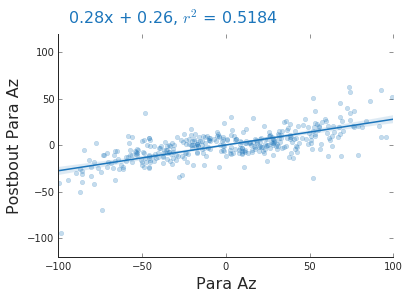

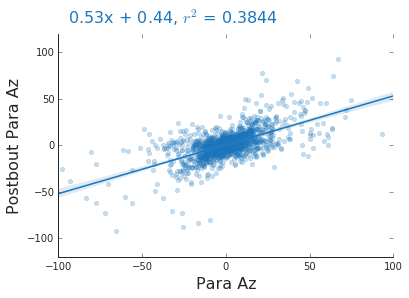

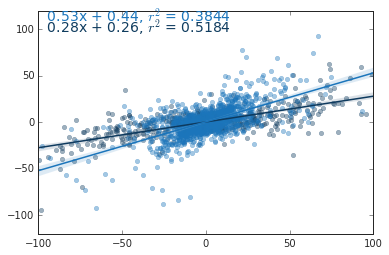

In [24]:
labels = ("Para Az", "Postbout Para Az")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
color = az_blue
colors = [.5*color, color]
lims = [[-100, 100],[-120, 120]]

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" == 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('az_b0vsb1plus.pdf')
pl.show()

SELECT "Para Alt","Postbout Para Alt" FROM bout_table WHERE "Para Alt" > 0 AND "Bout Number" == 0 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  354
Model:                            GLM   Df Residuals:                      352
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   107.579000231
Method:                          IRLS   Log-Likelihood:                -1329.3
Date:                Sun, 23 Jun 2019   Deviance:                       37868.
Time:                        02:05:48   Pearson chi2:                 3.79e+04
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const  

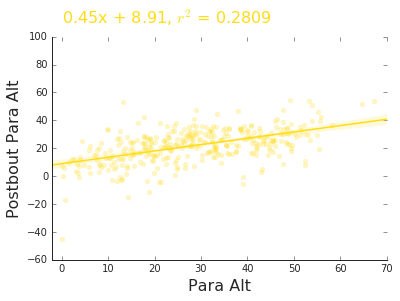

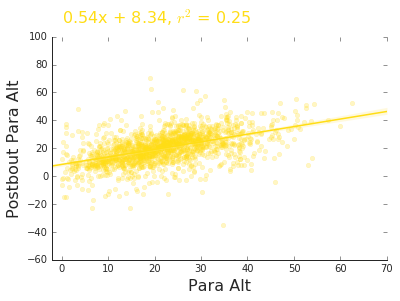

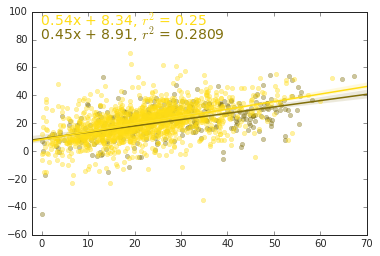

In [26]:
labels = ("Para Alt", "Postbout Para Alt")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
alt_yellow = np.array([255/255.0, 221/255.0, 21/255.0])
color = alt_yellow
#colors = [np.array([200/255.0, 200/255.0, 200/255.0]), color]
colors = [.5*color, color]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]

lims = [[-2, 70],[-60, 100]]

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" == 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('alt_b0vsb1plus.pdf')
pl.show()

SELECT "Para Dist","Postbout Para Dist" FROM bout_table WHERE "Bout Number" == 0 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  384
Model:                            GLM   Df Residuals:                      382
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   875.117053596
Method:                          IRLS   Log-Likelihood:                -1844.5
Date:                Sun, 23 Jun 2019   Deviance:                   3.3429e+05
Time:                        02:18:58   Pearson chi2:                 3.34e+05
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -23.9244   

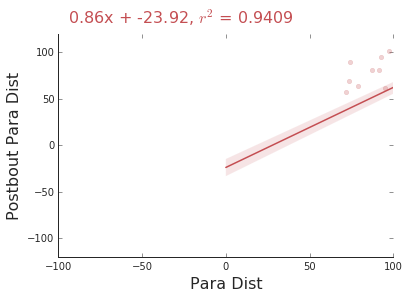

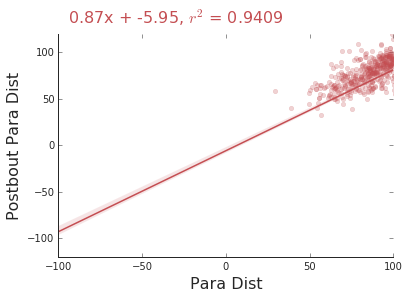

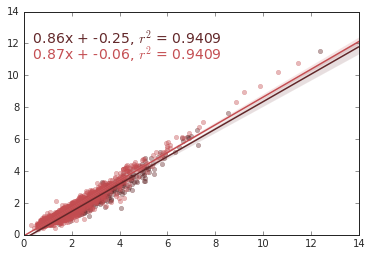

In [31]:
labels = ("Para Dist", "Postbout Para Dist")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
color = np.array(cp[3])
#dist_red = np.array([190/255.0, 30/255.0, 45/255.0])
#color = dist_red
colors = [.5*color, color]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
lims = [[-100, 100],[-120, 120]]

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" == 0 AND "Strike Or Abort" < 3', color, labels, lims)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims)

mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('dist_b0vsb1plus.pdf')
pl.show()

SELECT "Para Az","Postbout Para Az" FROM bout_table WHERE "Bout Number" > 6 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  228
Model:                            GLM   Df Residuals:                      226
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   204.353967626
Method:                          IRLS   Log-Likelihood:                -928.98
Date:                Sun, 23 Jun 2019   Deviance:                       46184.
Time:                        01:55:01   Pearson chi2:                 4.62e+04
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0700      0.

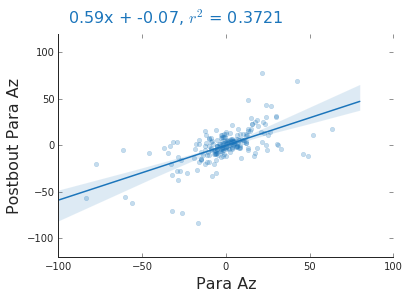

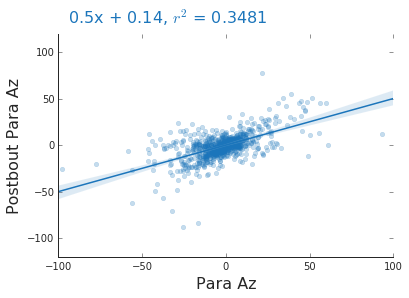

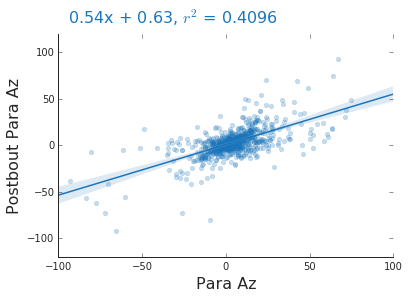

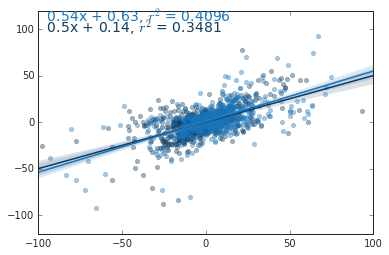

In [18]:
labels = ("Para Az", "Postbout Para Az")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
color = az_blue
#colors = [.5*np.array(cp[0]), 1.2*np.array(cp[0])]
colors = [.5*color, color]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
lims = [[-100, 100],[-120, 120]]
rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 6 AND "Strike Or Abort" < 3', color, labels, lims, 1)
rp[0].savefig('prepost_az.pdf')
rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Para Az Velocity" < 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)
rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Para Az Velocity" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('az_velocity.pdf')
pl.show()

SELECT "Para Alt","Postbout Para Alt" FROM bout_table WHERE "Bout Number" > 6 AND "Para Alt" > 0 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  208
Model:                            GLM   Df Residuals:                      206
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   125.560259782
Method:                          IRLS   Log-Likelihood:                -796.74
Date:                Sun, 23 Jun 2019   Deviance:                       25865.
Time:                        01:56:53   Pearson chi2:                 2.59e+04
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const   

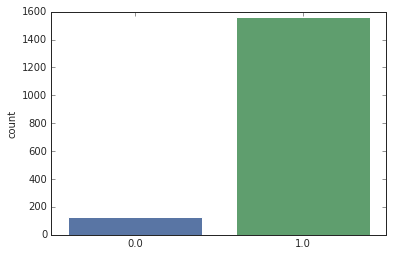

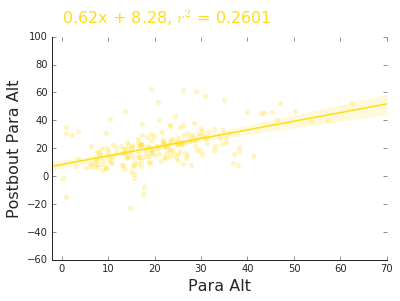

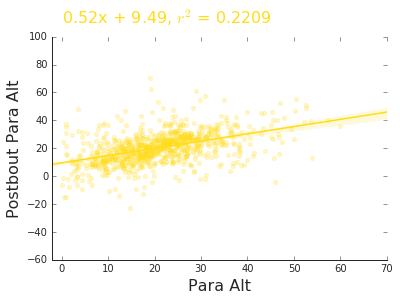

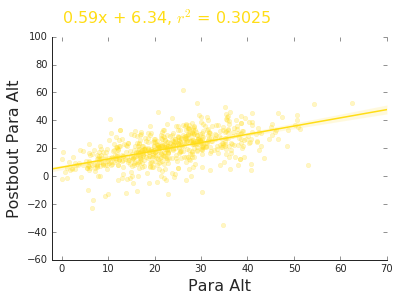

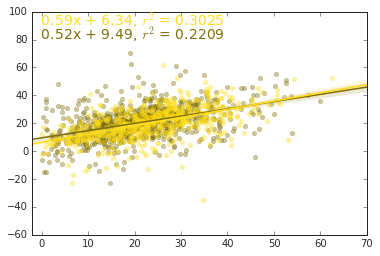

In [21]:
labels = ("Para Alt", "Postbout Para Alt")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
alt_yellow = np.array([255/255.0, 221/255.0, 21/255.0])
color = alt_yellow
#colors = [np.array([200/255.0, 200/255.0, 200/255.0]), color]
colors = [.5*color, color]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]

lims = [[-2, 70],[-60, 100]]
#lims = [[-70, 70],[-60, 100]]

#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 and .1')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Rev Bout Number" < -5 AND "Strike Or Abort" == 3', color, labels)
#rp = bdsim_raw.two_variable_regression(query_exp, '')

# THIS IS EVERY SINGLE BOUT -- NOTE THERE ARE 1692 pursuit bouts in the data in strikes < 3, and only 130 are below the fish. 

sb.countplot(np.ones(1562).tolist() + np.zeros(130).tolist())
pl.savefig('posnegcounts.pdf')

# rp = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 6 AND "Para Alt" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

rp[0].savefig('prepost_alt.pdf')


rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Para Alt Velocity" < 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)
rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Para Alt Velocity" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)
# rp = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)
# rp2 = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('alt_velocity.pdf')
pl.show()

SELECT "Para Dist","Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1692
Model:                            GLM   Df Residuals:                     1690
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   555.272665646
Method:                          IRLS   Log-Likelihood:                -7746.1
Date:                Wed, 26 Jun 2019   Deviance:                   9.3841e+05
Time:                        19:32:31   Pearson chi2:                 9.38e+05
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -5.9489    

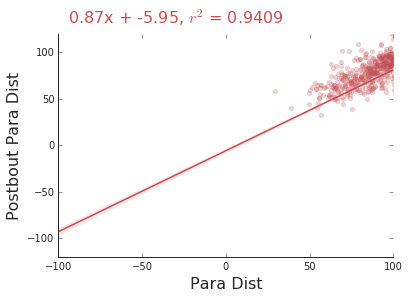

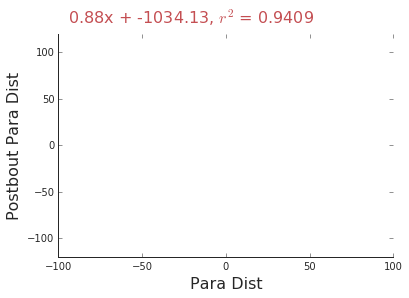

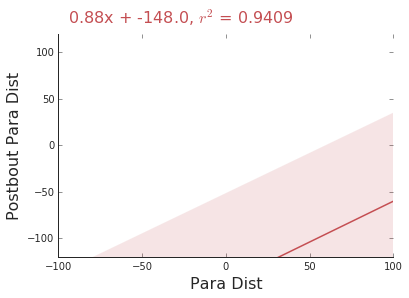

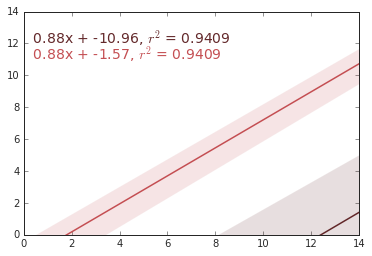

In [27]:
labels = ("Para Dist", "Postbout Para Dist")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
color = np.array(cp[3])
#dist_red = np.array([190/255.0, 30/255.0, 45/255.0])
#color = dist_red
colors = [.5*color, color]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
lims = [[-100, 100],[-120, 120]]
rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims)
rp[0].savefig('prepost_dist.pdf')
rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Para Dist Velocity" < 0 AND "Strike Or Abort" < 3', color, labels, lims)
rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Para Dist Velocity" > 0 AND "Strike Or Abort" < 3', color, labels, lims)
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('dist_velocity.pdf')
pl.show()

### ABORT VS STRIKE COMPARISON TWO V HIST

SELECT "Para Az","Postbout Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Strike Or Abort" == 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1134
Model:                            GLM   Df Residuals:                     1132
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   367.302435973
Method:                          IRLS   Log-Likelihood:                -4956.9
Date:                Thu, 27 Jun 2019   Deviance:                   4.1579e+05
Time:                        15:44:18   Pearson chi2:                 4.16e+05
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------


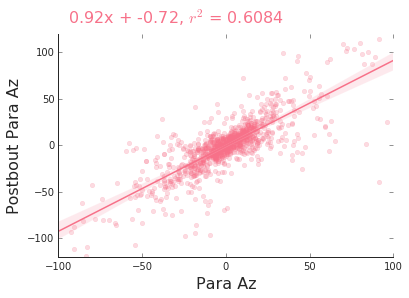

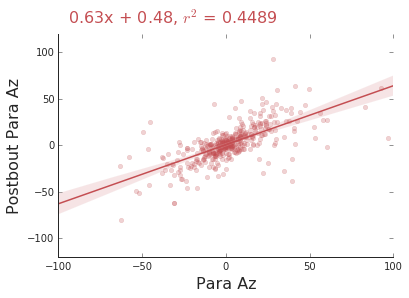

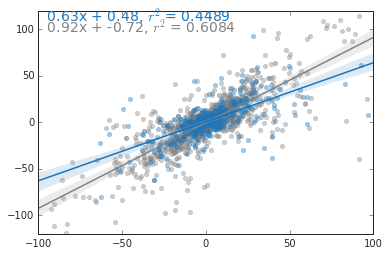

In [74]:
labels = ("Para Az", "Postbout Para Az")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
color = np.array(cp[3])
#dist_red = np.array([190/255.0, 30/255.0, 45/255.0])


colors = [[130.0 / 255, 130.0 / 255, 130.0 / 255], az_blue]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
lims = [[-100, 100],[-120, 120]]
# rp = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" < 3', color, labels, lims)

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Strike Or Abort" == 3', husl[0], labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3', color, labels, lims, 1)



mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('abort_az_marr.pdf')
pl.show()

SELECT "Para Alt","Postbout Para Alt" FROM bout_table WHERE "Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Strike Or Abort" == 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  920
Model:                            GLM   Df Residuals:                      918
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   131.459489195
Method:                          IRLS   Log-Likelihood:                -3548.6
Date:                Thu, 27 Jun 2019   Deviance:                   1.2068e+05
Time:                        12:41:10   Pearson chi2:                 1.21e+05
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------

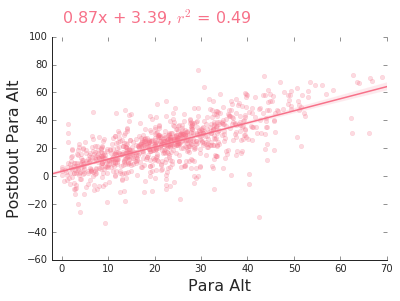

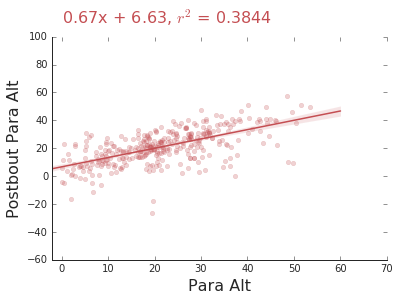

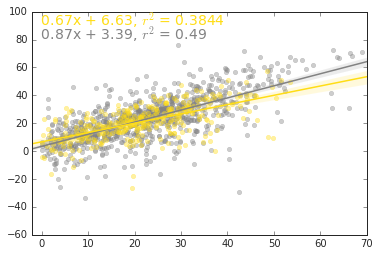

In [44]:
labels = ("Para Alt", "Postbout Para Alt")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
alt_yellow = np.array([255/255.0, 221/255.0, 21/255.0])
color = np.array(cp[3])
#dist_red = np.array([190/255.0, 30/255.0, 45/255.0])


colors = [[130.0 / 255, 130.0 / 255, 130.0 / 255], alt_yellow]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
#lims = [[-100, 100],[-120, 120]]
lims = [[-2, 70], [-60, 100]]
# rp = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" < 3', color, labels, lims)

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Strike Or Abort" == 3', husl[0], labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3', color, labels, lims, 1)
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('abort_alt_marr.pdf')
pl.show()

SELECT "Para Az","Bout Delta Yaw" FROM bout_table WHERE "Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  429
Model:                            GLM   Df Residuals:                      427
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   73.2288812535
Method:                          IRLS   Log-Likelihood:                -1528.7
Date:                Thu, 27 Jun 2019   Deviance:                       31269.
Time:                        17:12:05   Pearson chi2:                 3.13e+04
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
con

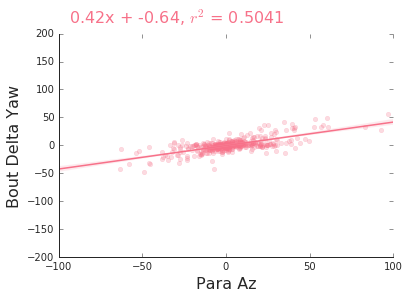

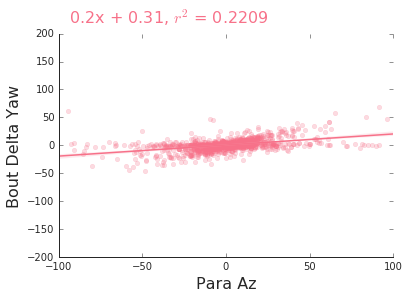

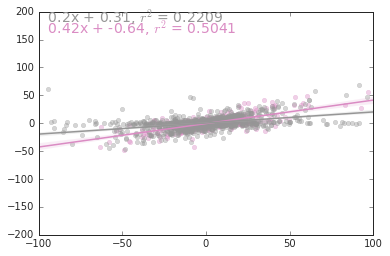

In [102]:
labels = ("Para Az", "Bout Delta Yaw")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
color = husl[0]
#dist_red = np.array([190/255.0, 30/255.0, 45/255.0])
colors = [cp[6], [150.0 / 255, 150.0 / 255, 150.0 / 255]]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
lims = [[-100, 100],[-200, 200]]
# rp = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" < 3', color, labels, lims)

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3', husl[0], labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Strike Or Abort" == 3', color, labels, lims, 1)
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('bout_dyaw_aborts.pdf')
pl.show()

SELECT "Para Alt","Bout Alt" FROM bout_table WHERE "Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  351
Model:                            GLM   Df Residuals:                      349
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                    588.52000641
Method:                          IRLS   Log-Likelihood:                -1616.3
Date:                Thu, 27 Jun 2019   Deviance:                   2.0539e+05
Time:                        16:51:43   Pearson chi2:                 2.05e+05
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------

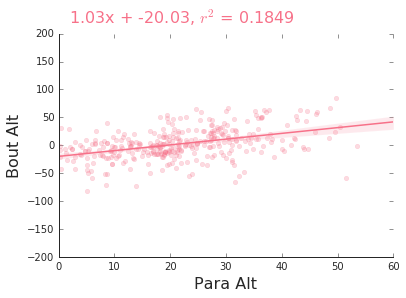

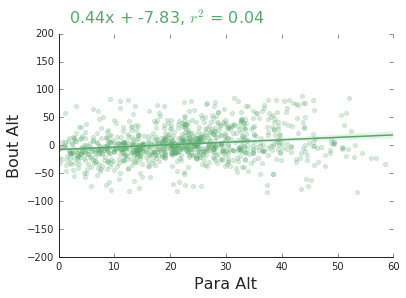

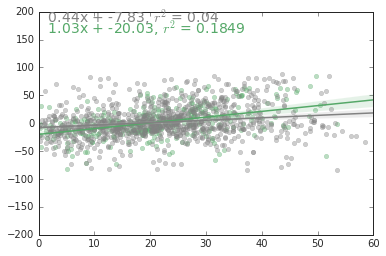

In [101]:
labels = ("Para Alt", "Bout Alt")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])

color = np.array(cp[2])
#dist_red = np.array([190/255.0, 30/255.0, 45/255.0])
colors = [cp[2], [130.0 / 255, 130.0 / 255, 130.0 / 255]]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
#lims = [[-100, 100],[-120, 120]]
lims = [[0, 60], [-200, 200]]
rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3', husl[0], labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Strike Or Abort" == 3', color, labels, lims, 1)
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('bout_alt_aborts.pdf')
pl.show()

### SINGLE VARIABLE HISTOGRAMS FOR STRIKE POSITION

SELECT "Para Dist" FROM bout_table WHERE "Bout Number" < 0 AND "Strike Or Abort" == 1
162 total bouts
82.3945289928
16.7477325163
0.873382007324
0.177525964673


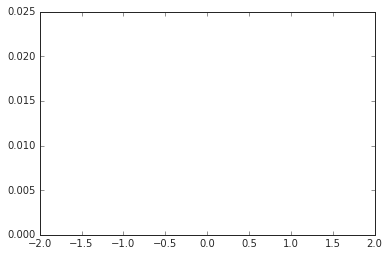

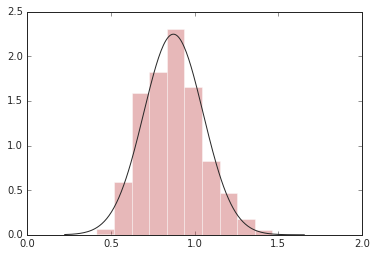

In [29]:
p1, d1 = bdsim_raw.single_hist('"Para Dist"', '"Bout Number" < 0 AND "Strike Or Abort" == 1', cp[0])
d1_mm = d1 * .0106
print np.mean(d1_mm)
print np.std(d1_mm)
pl.show()

fig = pl.figure()
dp = sb.distplot(d1_mm, kde=False, fit=norm, bins=10, color=cp[3])
dp.set_xlim([0, 2])
pl.show()
fig.savefig('strikezone_dist.pdf')

SELECT "Para Alt" FROM bout_table WHERE "Bout Number" < 0 AND "Strike Or Abort" == 1
162 total bouts
0.304015725617
0.196157060575
SELECT "Para Az" FROM bout_table WHERE "Bout Number" < 0 AND "Strike Or Abort" == 1
162 total bouts
0.0150917117469
0.125858952619
Alt Means
17.4188179835
11.2389716926
Az Means
0.864691388726
7.211186799


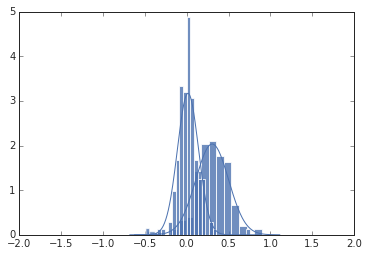

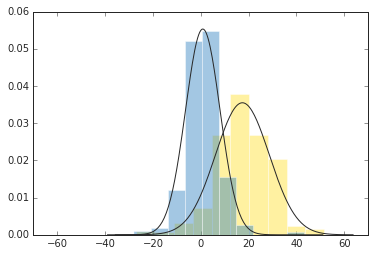

In [28]:
p1, d1 = bdsim_raw.single_hist('"Para Alt"', '"Bout Number" < 0 AND "Strike Or Abort" == 1', cp[0])
p2, d2 = bdsim_raw.single_hist('"Para Az"', '"Bout Number" < 0 AND "Strike Or Abort" == 1', cp[0])
d1_deg = np.degrees(d1)
d2_deg = np.degrees(d2)
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
alt_yellow = np.array([255/255.0, 221/255.0, 21/255.0])
print('Alt Means')
print np.mean(d1_deg)
print np.std(d1_deg)
print('Az Means')
print np.mean(d2_deg)
print np.std(d2_deg)
pl.show()

fig = pl.figure()
dp = sb.distplot(d1_deg, kde=False, fit=norm, bins=10, color=alt_yellow.tolist())
dp = sb.distplot(d2_deg, kde=False, fit=norm, bins=10, color=az_blue.tolist())
dp.set_xlim([-70, 70])
pl.show()
fig.savefig('strikezone.pdf')

### SINGLE VARIABLE HISTOGRAMS FOR DISTRIBUTION OF POSTBOUT PARA POSITION

SELECT "Postbout Para Alt" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > .611 AND "Para Alt" < .611 + .087 AND "Strike Or Abort" < 3
46 total bouts
0.170096028391
0.329047286518
SELECT "Postbout Para Alt" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > .524 AND "Para Alt" < .524 + .087 AND "Strike Or Abort" < 3
54 total bouts
0.184376641407
0.325462688684
SELECT "Postbout Para Alt" FROM bout_table WHERE "Bout Number" > 0 AND "Para Alt" > .436 AND "Para Alt" < .436 + .087 AND "Strike Or Abort" < 3
265 total bouts
0.428081037438
0.159748510772
SELECT "Postbout Para Alt" FROM bout_table WHERE "Bout Number" > 0 AND "Para Alt" > .349 AND "Para Alt" < .349 + .087 AND "Strike Or Abort" < 3
290 total bouts
0.375212271855
0.152881064585
SELECT "Postbout Para Alt" FROM bout_table WHERE "Bout Number" > 0 AND "Para Alt" > .262 AND "Para Alt" < .262 + .087 AND "Strike Or Abort" < 3
285 total bouts
0.301608962916
0.162530010293
SELECT "Postbout Para Alt" FROM bout_table WHERE "Bout

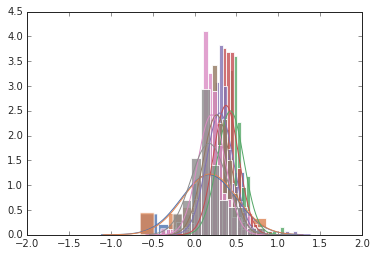

9.74578453876
10.5640033934
24.5272367348
21.4980795988
17.2809206384
15.0900471145
11.6060999529
9.86952616375


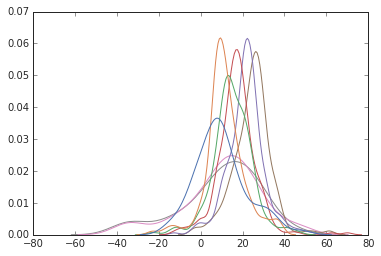

In [7]:
p0, d0 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Az" > .611 AND "Para Alt" < .611 + .087 AND "Strike Or Abort" < 3', cp[0])
p1, d1 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Az" > .524 AND "Para Alt" < .524 + .087 AND "Strike Or Abort" < 3', cp[1])
p2, d2 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .436 AND "Para Alt" < .436 + .087 AND "Strike Or Abort" < 3', cp[2])
p3, d3 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .349 AND "Para Alt" < .349 + .087 AND "Strike Or Abort" < 3', cp[3])
p4, d4 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .262 AND "Para Alt" < .262 + .087 AND "Strike Or Abort" < 3', cp[4])
p5, d5 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .175 AND "Para Alt" < .175 + .087 AND "Strike Or Abort" < 3', cp[5])
p6, d6 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .087 AND "Para Alt" < .087 + .087 AND "Strike Or Abort" < 3', cp[6])
p7, d7 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > 0 AND "Para Alt" < .087 AND "Strike Or Abort" < 3', cp[7])
pl.show()

print np.mean(np.degrees(d0))
print np.mean(np.degrees(d1))
print np.mean(np.degrees(d2))
print np.mean(np.degrees(d3))
print np.mean(np.degrees(d4))
print np.mean(np.degrees(d5))
print np.mean(np.degrees(d6))
print np.mean(np.degrees(d7))


sb.kdeplot(np.degrees(d0), color=cp[7])
sb.kdeplot(np.degrees(d1), color=cp[6])
sb.kdeplot(np.degrees(d2), color=cp[5])
sb.kdeplot(np.degrees(d3), color=cp[4])
sb.kdeplot(np.degrees(d4), color=cp[3])
sb.kdeplot(np.degrees(d5), color=cp[2])
sb.kdeplot(np.degrees(d6), color=cp[1])
sb.kdeplot(np.degrees(d7), color=cp[0])


0.349065850399
0.174532925199
0.0872664625997
SELECT "Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > .349 AND "Para Az" < .349 + .087 AND "Strike Or Abort" < 3
78 total bouts
0.390273996077
0.0243934641491
SELECT "Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > .262 AND "Para Az" < .262 + .087 AND "Strike Or Abort" < 3
150 total bouts
0.301695086007
0.0240096821654
SELECT "Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > .175 AND "Para Az" < .175 + .087 AND "Strike Or Abort" < 3
254 total bouts
0.215372389705
0.0254757146801
SELECT "Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > .087 AND "Para Az" < .087 + .087 AND "Strike Or Abort" < 3
428 total bouts
0.127226193708
0.0247110006903
SELECT "Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > 0 AND "Para Az" < .087 AND "Strike Or Abort" < 3
581 total bouts
0.0436438009208
0.0246106970119
SELECT "Postbout Para Az" FROM bout_table WHERE "Bout Number" > 0 AND

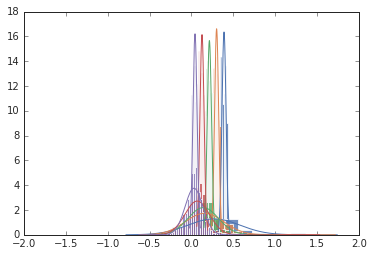

15.4462943347
8.99556678913
8.15163359143
3.96139916719
1.7831132481


(0, 1.5)

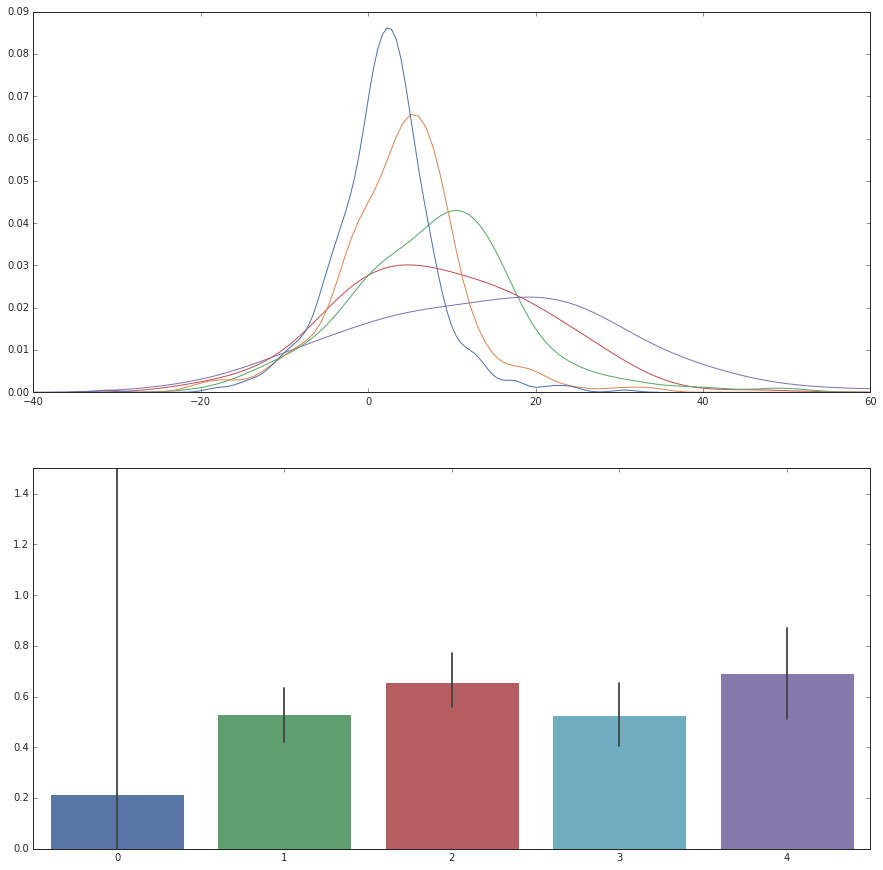

In [25]:
print np.radians(20)
print np.radians(10)
print np.radians(5)


# NOTE THERE ARE VERY FEW BOUTS OUTSIDE OF 25 DEGREES DURING PURSUITS. INNER THREE BINS HAVE 1300 bouts, outer two only 40 combined.

p1, d1 = bdsim.single_hist('"Para Az"', '"Bout Number" > 0 AND "Para Az" > .349 AND "Para Az" < .349 + .087 AND "Strike Or Abort" < 3', cp[0])
p2, d2 = bdsim.single_hist('"Para Az"', '"Bout Number" > 0 AND "Para Az" > .262 AND "Para Az" < .262 + .087 AND "Strike Or Abort" < 3', cp[1])
p3, d3 = bdsim.single_hist('"Para Az"', '"Bout Number" > 0 AND "Para Az" > .175 AND "Para Az" < .175 + .087 AND "Strike Or Abort" < 3', cp[2])
p4, d4 = bdsim.single_hist('"Para Az"', '"Bout Number" > 0 AND "Para Az" > .087 AND "Para Az" < .087 + .087 AND "Strike Or Abort" < 3', cp[3])
p5, d5 = bdsim.single_hist('"Para Az"', '"Bout Number" > 0 AND "Para Az" > 0 AND "Para Az" < .087 AND "Strike Or Abort" < 3', cp[4])

paz1 = np.mean(np.degrees(d1))
paz2 = np.mean(np.degrees(d2))
paz3 = np.mean(np.degrees(d3))
paz4 = np.mean(np.degrees(d4))
paz5 = np.mean(np.degrees(d5))

paz1 = np.degrees(d1)
paz2 = np.degrees(d2)
paz3 = np.degrees(d3)
paz4 = np.degrees(d4)
paz5 = np.degrees(d5)

p1, d1 = bdsim.single_hist('"Postbout Para Az"', '"Bout Number" > 0 AND "Para Az" > .349 AND "Para Az" < .349 + .087 AND "Strike Or Abort" < 3', cp[0])
p2, d2 = bdsim.single_hist('"Postbout Para Az"', '"Bout Number" > 0 AND "Para Az" > .262 AND "Para Az" < .262 + .087 AND "Strike Or Abort" < 3', cp[1])
p3, d3 = bdsim.single_hist('"Postbout Para Az"', '"Bout Number" > 0 AND "Para Az" > .175 AND "Para Az" < .175 + .087 AND "Strike Or Abort" < 3', cp[2])
p4, d4 = bdsim.single_hist('"Postbout Para Az"', '"Bout Number" > 0 AND "Para Az" > .087 AND "Para Az" < .087 + .087 AND "Strike Or Abort" < 3', cp[3])
p5, d5 = bdsim.single_hist('"Postbout Para Az"', '"Bout Number" > 0 AND "Para Az" > 0 AND "Para Az" < .087 AND "Strike Or Abort" < 3', cp[4])




pl.show()

#sb.kdeplot(np.degrees(d1), color=cp[0])

print np.mean(np.degrees(d1))
print np.mean(np.degrees(d2))
print np.mean(np.degrees(d3))
print np.mean(np.degrees(d4))
print np.mean(np.degrees(d5))

fig, ax = pl.subplots(2,1, figsize=(15,15))

sb.kdeplot(np.degrees(d1), color=cp[4], ax=ax[0])
sb.kdeplot(np.degrees(d2), color=cp[3], ax=ax[0])
sb.kdeplot(np.degrees(d3), color=cp[2], ax=ax[0])
sb.kdeplot(np.degrees(d4), color=cp[1], ax=ax[0])
sb.kdeplot(np.degrees(d5), color=cp[0], ax=ax[0])
ax[0].set_xlim([-40, 60])
pl.savefig('KDE_5degbins_prebpostaz.pdf')


sb.barplot(data=[np.degrees(d5) / paz5, np.degrees(d4) / paz4, 
                 np.degrees(d3) / paz3, np.degrees(d2) / paz2, 
                 np.degrees(d1) / paz1], ax=ax[1])

ax[1].set_ylim([0, 1.5])

# ARGUMENT!!!!!!
# IF FAR AWAY IN AZ, WANT TO BE NOISY. THIS IS TRUE (i.e. more noise, same mean -- also point out regression fit)
# IF VERY CLOSE, WANT TO BE PRECISE! THIS AGAIN IS TRUE. SHOW STD FOR .005 to .006, etc. THERE IS LESS NOISE, 
# MEANING THE FISH IS TRYING TO BE STATIC! 
# THE STATIC TRANSFORMATION DOES BETTER IF THE PARA STARTS IN THE LOW NOISE ZONE. IT DOES WORSE IF IT STARTS AWAY!


### SINGLE VARIABLE HISTOGRAMS

SELECT "Bout Number" FROM bout_table WHERE "Rev Bout Number" == -2  AND "Strike Or Abort" < 3
444 total bouts
4.12162162162
2.94905406747
SELECT "Bout Number" FROM bout_table WHERE "Rev Bout Number" == -2  AND "Strike Or Abort" == 3
522 total bouts
2.68199233716
2.81389911235
5.0
4.0
Counter({4.0: 94, 5.0: 92, 6.0: 66, 7.0: 48, 8.0: 33, 3.0: 28, 9.0: 18, 2.0: 17, 10.0: 11, 11.0: 10, 12.0: 8, 13.0: 6, 14.0: 4, 15.0: 4, 16.0: 2, 17.0: 1, 21.0: 1, 26.0: 1})
Counter({3.0: 122, 2.0: 98, 4.0: 89, 5.0: 73, 6.0: 49, 8.0: 28, 7.0: 15, 9.0: 15, 10.0: 11, 11.0: 7, 12.0: 6, 13.0: 6, 19.0: 2, 28.0: 1})


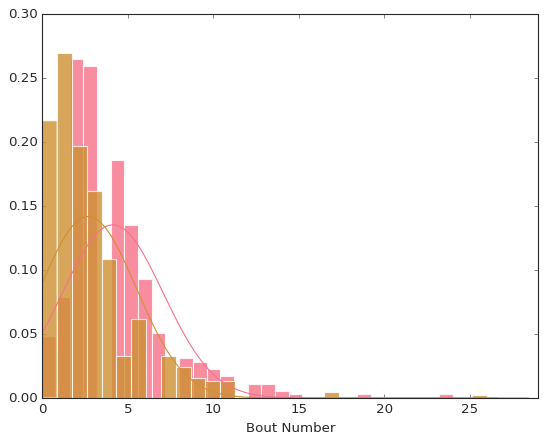

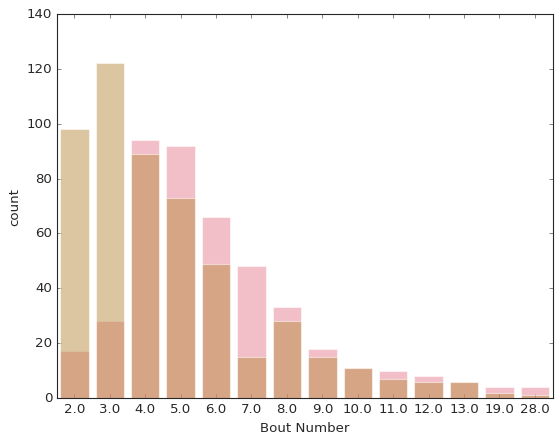

In [11]:
#p1, d1 = bdsim_raw.single_hist('"Para Alt"', '"Bout Number" <= -1  AND "Strike Or Abort" == 2', husl[0])
#p2, d2 = bdsim_raw.single_hist('"Bout Dist"', '"Bout Number" > 0  AND "Strike Or Abort" <= 2', husl[0], [50,[0,1000]])
#p3, d3 = bdsim_raw.single_hist('"Para Az"', '"Rev Bout Number" == -2  AND "Strike Or Abort" < 3', husl[0])
#p3, d3 = bdsim_raw.single_hist('"Para Az"', '"Rev Bout Number" == -2  AND "Strike Or Abort" == 3', husl[1])
#fit = beta.fit(d2, floc=0)

p1, d1 = bdsim_allnans.single_hist('"Bout Number"', '"Rev Bout Number" == -2  AND "Strike Or Abort" < 3', husl[0], [30, [0,29]])
p2, d2 = bdsim_allnans.single_hist('"Bout Number"', '"Rev Bout Number" == -2  AND "Strike Or Abort" == 3', husl[1], [30, [0,29]])
#fit = beta.fit(d2, floc=0)
#fit = exponnorm.fit(d2, floc=.3)
#print fit
#pl.plot(np.linspace(-2,2,100), [beta.pdf(x, fit[0], fit[1], scale=fit[3]) for x in np.linspace(-2,2,100)])
#pl.plot(np.linspace(-2,2,100), [exponnorm.pdf(x, fit[0], fit[1], scale=fit[2]) for x in np.linspace(-2,2,100)])
#normfit = norm.fit(d2)
#print normfit


pl.figure()

sb.countplot(d1 + 2, color=husl[0], alpha=0.5)
print np.median(d1+2)
sb.countplot(d2 + 2, color=husl[1], alpha=0.5)
print np.median(d2+2)
print Counter(d1 + 2)
print Counter(d2 + 2)

pl.show()

### USE FOR DESCRIBING PARA SPECIFIC FEATURES

0.158394285714
SELECT "Avg Para Velocity" FROM bout_table WHERE "Bout Number" = 0 AND "Strike Or Abort" <= 3
962 total bouts
3.41919081896
1.78765052075


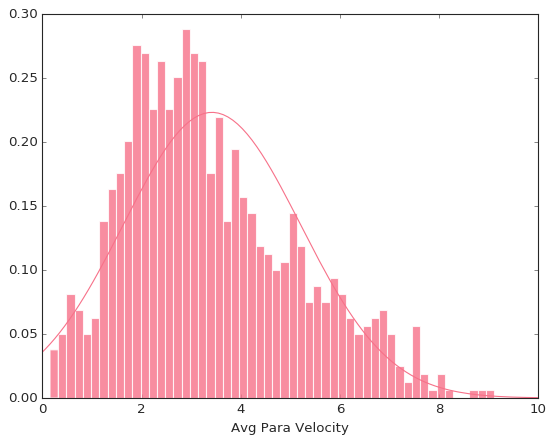

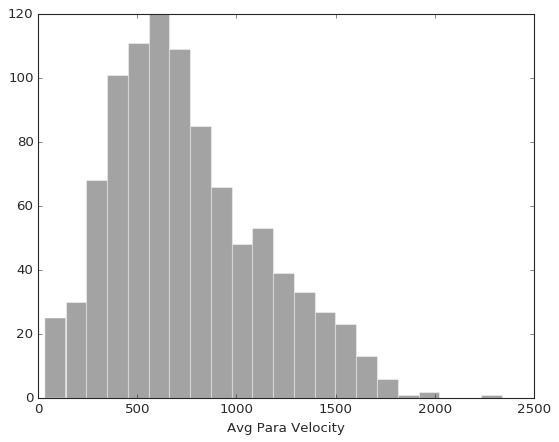

(755.07130585331788, 394.77282333252509)
(237,)
(962,)
682.520063429


In [146]:
# p1, d1 = bdsim_raw.single_hist('"Avg Para Velocity"', '"Strike Or Abort" < 3', husl[0], [200, [0,10]])
# pl.show()

# #d1 = np.abs(d1) 
# #d1 = np.degrees(np.abs(d1))
# print np.mean(d1)
# fig, ax = pl.subplots(1,1)
# sb.distplot(d1, kde=0, ax=ax, bins=100)
# ax.set_xlim([0,10])
# pl.show()


# measured 35 random para lengths in cont.AVI from 090518_2
avg_para_size = .0106 * np.array([11,15,17,14,11,15,14,15,14,15,17,14,16,18,18,17,13,18,11,13,16,13,18,19,15,16,15,17,12,16,16,13,12, 15,14])
print np.mean(avg_para_size)
cpal = sb.color_palette()

# Mean para size is 158 microns


p1, d1 = bdsim_raw.single_hist('"Avg Para Velocity"', '"Bout Number" = 0 AND "Strike Or Abort" <= 3', husl[0], [100, [0,10]])
pl.show()

fig, ax = pl.subplots(1,1)
d1 = d1 * .0106 / .048 * 1000
sb.distplot(d1, kde=0, color=cpal[6], ax=ax)
ax.set_xlim([0,2500])
pl.show()
nf = norm.fit(d1)
print nf

print d1[d1 > 1000].shape
print d1.shape

print np.median(d1)

fig.savefig('sing_hist.pdf')
#norm.cdf(400, nf[0], nf[1])

# Tank is 20 mm long, and covered by 1888 pixels. .0106 mm / pixel 

# Avg velocity is how many pixels the para moved in 3 frames (48 ms). 
# so you want to take your avg velocity in pixels / 3fr
# multiply by .0106 mm / pixel, mutiply by 1 3fr / .048 ms. 



In [50]:
print normfit
print norm.cdf(.5, .30, .19)

(0.30401572561728391, 0.19615706057480004)
0.853745060908


SELECT "Para Alt Velocity" FROM bout_table WHERE "Bout Number" = 0 AND "Strike Or Abort" <= 3
962 total bouts
0.000501424862786
0.30690354586


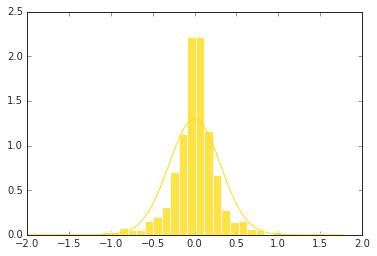

0.0287295283806
17.5842778954


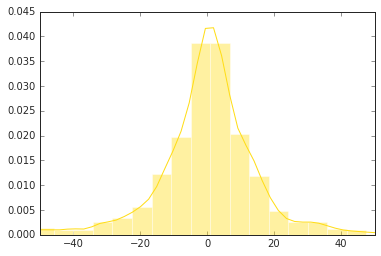

In [33]:
alt_yellow = [255/255.0, 221/255.0, 21/255.0]
p1, d1 = bdsim_raw.single_hist('"Para Alt Velocity"', '"Bout Number" = 0 AND "Strike Or Abort" <= 3', alt_yellow)
pl.show()
d1_deg = np.degrees(d1)
print np.mean(d1_deg)
print np.std(d1_deg)

fig, ax = pl.subplots(1,1)
sb.distplot(d1_deg, ax=ax, color=alt_yellow)
ax.set_xlim([-50, 50])
fig.savefig('stimvelocity_alt.pdf')

SELECT "Para Az Velocity" FROM bout_table WHERE "Bout Number" = 0 AND "Strike Or Abort" <= 3
962 total bouts
0.0147662429938
0.376349215939


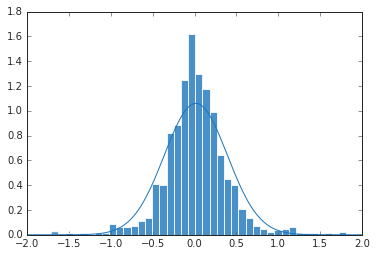

0.846043402807
21.5632216964


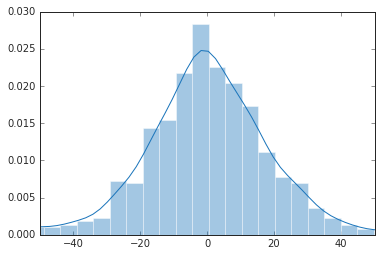

In [34]:
az_blue = [27/255.0, 117/255.0, 187/255.0]
p1, d1 = bdsim_raw.single_hist('"Para Az Velocity"', '"Bout Number" = 0 AND "Strike Or Abort" <= 3', az_blue)
pl.show()
d1_deg = np.degrees(d1)
print np.mean(d1_deg)
print np.std(d1_deg)

fig, ax = pl.subplots(1,1)
sb.distplot(d1_deg, ax=ax, color=az_blue)
ax.set_xlim([-50, 50])
fig.savefig('stimvelocity_az.pdf')

SELECT "Para Dist Velocity" FROM bout_table WHERE "Bout Number" = 0 AND "Strike Or Abort" <= 3
962 total bouts
-0.654817247028
66.3258900451


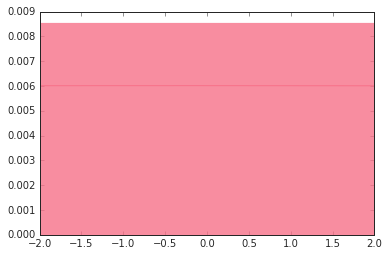

-0.0069410628185
0.703054434478


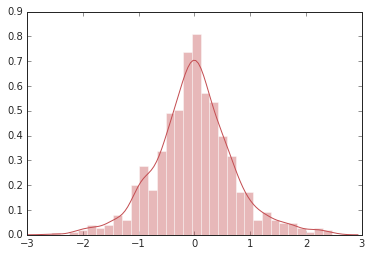

In [35]:
p1, d1 = bdsim_raw.single_hist('"Para Dist Velocity"', '"Bout Number" = 0 AND "Strike Or Abort" <= 3', husl[0])
pl.show()
d1_mm = .0106 * d1
print np.mean(d1_mm)
print np.std(d1_mm)
fig, ax = pl.subplots(1,1)
sb.distplot(d1_mm, ax=ax, color=cp[3])
ax.set_xlim([-3, 3])
fig.savefig('stimvelocity_dist.pdf')

### PREDICTION CALCULATORS

In [116]:
# ALWAYS USE INVERTED DATA HERE!
spacing = .3
p_angle_bounds = [[i, i+spacing] for i in np.arange(0,1,spacing)]
norm_az = 0
norm_alt = 0
p_angle_bounds_invert = [[-a[1], -a[0]] for a in p_angle_bounds]
print p_angle_bounds_invert
vels = [-5, -.01]
vels = [.01, 5]
use_abs_val = 0
distance_limit = [0, 1000]
#p_angle_bounds = [[0, 1]]
#distance_limit = [0, 200]
actions = [1,2]
#skip_bout_numbers = ['reverse', range(-50, -3) + [-1]]
#skip_bout_numbers = ['forward', range(1, 50) + [-1]]
skip_bout_numbers = ['forward', [-1,0]]

[[-0.29999999999999999, -0.0], [-0.59999999999999998, -0.29999999999999999], [-0.89999999999999991, -0.59999999999999998], [-1.2, -0.89999999999999991]]


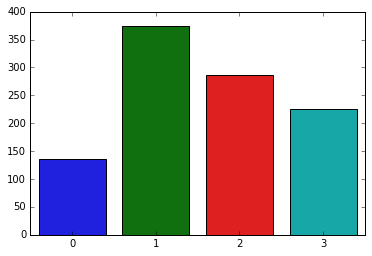

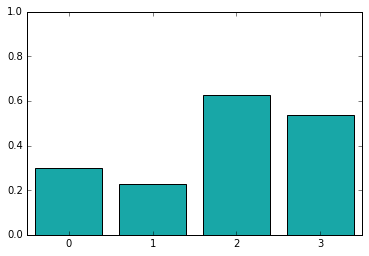

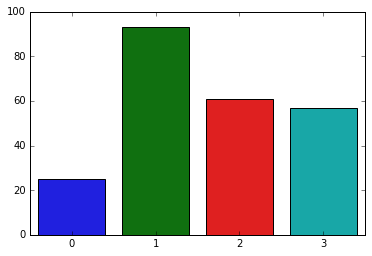

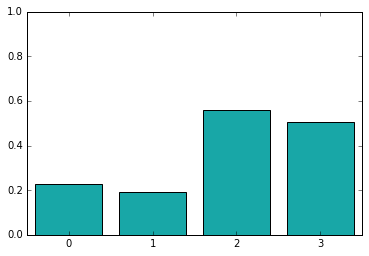

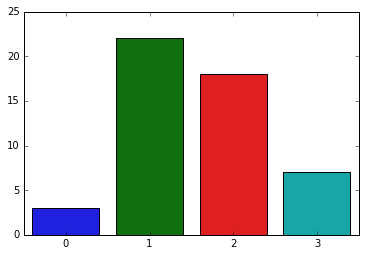

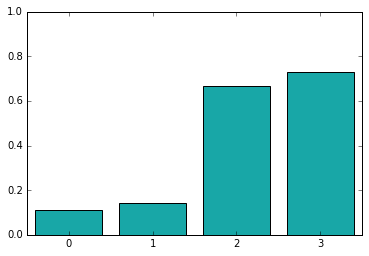

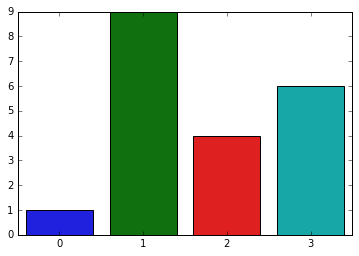

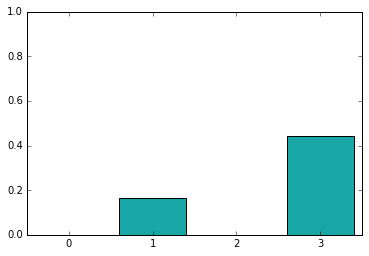

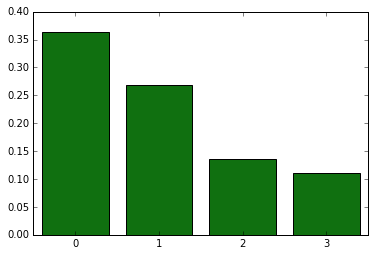

TOTAL BOUTS
[511, 118, 25, 10]


In [117]:
tb, bout_assignment = pred_wrapper(data, p_angle_bounds, 
                                   skip_bout_numbers, actions, distance_limit, use_abs_val, vels, 
                                   norm_az, norm_alt, 'az')

IndexError: list index out of range

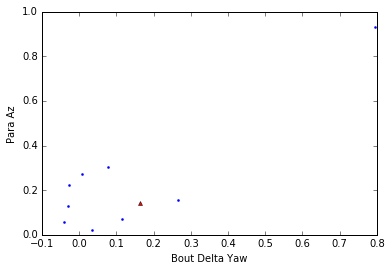

In [118]:
varb = "Bout Delta Yaw"
varb_predict_overshoot = []
varb_predict_undershoot = []

p_angle_bounds = p_angle_bounds[0]
plot_varb1 = "Bout Delta Yaw"
plot_varb2 = "Para Az"

# a bout assignment of 1 is an undershooting lag.
# bout assignment of 2 is an overshooting lag
# bout assignment of 3 is an undershooting lead.
# bout assignment of 4 is an overshooting lead

# dots are lags, triangles are leads
# blue is undershoot, red is overshoot

for ind, p_az in enumerate(data["Para Az"]):
        marker_size = 4
        if bout_assignment[ind] == 0:
            continue
        if bout_assignment[ind] == 1:
            marker_type = '.'
            p_color = 'b'
        if bout_assignment[ind] == 2:
            marker_type = '.'
            p_color = 'r'
        if bout_assignment[ind] == 3:
            marker_type = '^'
            p_color = 'b'
            varb_predict_undershoot.append(data[varb][ind])
        if bout_assignment[ind] == 4:
            marker_type = '^'
            p_color = 'r'
            varb_predict_overshoot.append(data[varb][ind])
        pl.plot(data[plot_varb1][ind], data[plot_varb2][ind], color=p_color,
            marker=marker_type, ms=marker_size, linestyle='None')
        pl.xlabel(plot_varb1)
        pl.ylabel(plot_varb2)
pl.savefig('circle_triangle_plot.pdf')
pl.figure()
sb.distplot(varb_predict_overshoot, fit_kws={"color":"blue"}, fit=norm, kde=False,color='b')
sb.distplot(varb_predict_undershoot, fit_kws={"color":"yellow"}, fit=norm, kde=False,color='y')


pl.savefig('prediction_tally.pdf')

# RED CIRCLES ARE A FAIL TO LEAD WHEN PARA IS GOING RIGHT
# BLUE CIRCLES ARE A FAIL TO LEAD WHEN PARA IS GOING LEFT
# RED SQUARES ARE A SUCCESSFUL LEAD WHEN PARA IS GOING RIGHT
# BLUE TRIANGLES ARE SUCCESSFUL LEADS WHEN PARA IS GOING LEFT
# RED CIRCLES ACCOUNT FOR NOT SEEING A CHANGE IN BOUT AZ AND YAW IN THIS WINDOW! 

In [ ]:
pred_velocities = []
for loc, i in enumerate(bout_assignment):
    if i != 0:
        pred_velocities.append(data["Para Az Velocity"][loc])
pl.hist(3*np.degrees(pred_velocities), bins=20)

        
        

#         print('Pred Bout Assignment: ' + str(bout_assignment[loc]))
#         a = raw_input('')

In [ ]:
print np.degrees(np.mean(np.abs(data["Para Az Velocity"])))
#print np.degrees(np.mean(np.abs(nac_data["Para Az Velocity"])))

(6698,)
(6698,)


[-3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 -2,
 -1,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -4,
 -3,
 -2,
 -1,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 -2,
 -1,